In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend
import lifetimes

In [11]:
df = pd.read_csv(r'C:\Users\HP\Desktop\market\segm\sales_data.csv')
df

Order Date  Order ID                     Product  \
0       2019-01-22 21:25:00    141234                      iPhone   
1       2019-01-28 14:15:00    141235    Lightning Charging Cable   
2       2019-01-17 13:33:00    141236            Wired Headphones   
3       2019-01-05 20:33:00    141237            27in FHD Monitor   
4       2019-01-25 11:59:00    141238            Wired Headphones   
...                     ...       ...                         ...   
185945  2019-12-11 20:58:00    319666    Lightning Charging Cable   
185946  2019-12-01 12:01:00    319667       AA Batteries (4-pack)   
185947  2019-12-09 06:43:00    319668             Vareebadd Phone   
185948  2019-12-03 10:39:00    319669            Wired Headphones   
185949  2019-12-21 21:45:00    319670  Bose SoundSport Headphones   

         Product_ean     catégorie                        Purchase Address  \
0       5.638009e+12     Vêtements         944 Walnut St, Boston, MA 02215   
1       5.563320e+12  Alimentation        185 Maple St, Portland, OR 97035   
2       2.113973e+12     Vêtements   538 Adams St, San Francisco, CA 94016   
3       3.069157e+12        Sports      738 10th St, Los Angeles, CA 90001   
4       9.692681e+12  Électronique           387 10th St, Austin, TX 73301   
...              ...           ...                                     ...   
185945  6.545974e+12  Électronique  14 Madison St, San Francisco, CA 94016   
185946  5.352480e+12  Électronique    549 Willow St, Los Angeles, CA 90001   
185947  2.674213e+12  Alimentation        273 Wilson St, Seattle, WA 98101   
185948  5.216304e+12  Alimentation          778 River St, Dallas, TX 75001   
185949  8.081038e+12  Électronique  747 Chestnut St, Los Angeles, CA 90001   

        Quantity Ordered  Price Each  Cost price  turnover    margin  
0                      1      700.00    231.0000    700.00  469.0000  
1                      1       14.95      7.4750     14.95    7.4750  
2                      2       11.99      5.9950     23.98   11.9900  
3                      1      149.99     97.4935    149.99   52.4965  
4                      1       11.99      5.9950     11.99    5.9950  
...                  ...         ...         ...       ...       ...  
185945                 1       14.95      7.4750     14.95    7.4750  
185946                 2        3.84      1.9200      7.68    3.8400  
185947                 1      400.00    132.0000    400.00  268.0000  
185948                 1       11.99      5.9950     11.99    5.9950  
185949                 1       99.99     49.9950     99.99   49.9950  

[185950 rows x 11 columns]

In [12]:
df.dtypes

Order Date           object
Order ID              int64
Product              object
Product_ean         float64
catégorie            object
Purchase Address     object
Quantity Ordered      int64
Price Each          float64
Cost price          float64
turnover            float64
margin              float64
dtype: object

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df['month'] = df['Order Date'].dt.month

In [15]:
df['year'] = df['Order Date'].dt.year

In [16]:
df['Order Date1']=df['Order Date'].dt.to_period('M').dt.to_timestamp('M')

In [17]:
df['state']=df['Purchase Address'].apply(lambda x : x.split(',')[1])

In [18]:
le = LabelEncoder()
df['customer_id']=le.fit_transform(df[['Purchase Address']])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
df.drop(columns = 'Purchase Address',inplace=True)

In [23]:
df

Order Date  Order ID                     Product  \
0      2019-01-22 21:25:00    141234                      iPhone   
1      2019-01-28 14:15:00    141235    Lightning Charging Cable   
2      2019-01-17 13:33:00    141236            Wired Headphones   
3      2019-01-05 20:33:00    141237            27in FHD Monitor   
4      2019-01-25 11:59:00    141238            Wired Headphones   
...                    ...       ...                         ...   
185945 2019-12-11 20:58:00    319666    Lightning Charging Cable   
185946 2019-12-01 12:01:00    319667       AA Batteries (4-pack)   
185947 2019-12-09 06:43:00    319668             Vareebadd Phone   
185948 2019-12-03 10:39:00    319669            Wired Headphones   
185949 2019-12-21 21:45:00    319670  Bose SoundSport Headphones   

         Product_ean     catégorie  Quantity Ordered  Price Each  Cost price  \
0       5.638009e+12     Vêtements                 1      700.00    231.0000   
1       5.563320e+12  Alimentation                 1       14.95      7.4750   
2       2.113973e+12     Vêtements                 2       11.99      5.9950   
3       3.069157e+12        Sports                 1      149.99     97.4935   
4       9.692681e+12  Électronique                 1       11.99      5.9950   
...              ...           ...               ...         ...         ...   
185945  6.545974e+12  Électronique                 1       14.95      7.4750   
185946  5.352480e+12  Électronique                 2        3.84      1.9200   
185947  2.674213e+12  Alimentation                 1      400.00    132.0000   
185948  5.216304e+12  Alimentation                 1       11.99      5.9950   
185949  8.081038e+12  Électronique                 1       99.99     49.9950   

        turnover    margin  month  year Order Date1           state  \
0         700.00  469.0000      1  2019  2019-01-31          Boston   
1          14.95    7.4750      1  2019  2019-01-31        Portland   
2          23.98   11.9900      1  2019  2019-01-31   San Francisco   
3         149.99   52.4965      1  2019  2019-01-31     Los Angeles   
4          11.99    5.9950      1  2019  2019-01-31          Austin   
...          ...       ...    ...   ...         ...             ...   
185945     14.95    7.4750     12  2019  2019-12-31   San Francisco   
185946      7.68    3.8400     12  2019  2019-12-31     Los Angeles   
185947    400.00  268.0000     12  2019  2019-12-31         Seattle   
185948     11.99    5.9950     12  2019  2019-12-31          Dallas   
185949     99.99   49.9950     12  2019  2019-12-31     Los Angeles   

        customer_id  
0            132266  
1             13519  
2             68669  
3             99824  
4             44894  
...             ...  
185945         6487  
185946        70444  
185947        27410  
185948       106162  
185949       101282  

[185950 rows x 15 columns]

# Customers

### Cohort Analysis

In [30]:
df['Min_date']=df.groupby("customer_id")["Order Date"].transform('min')

In [39]:
df['Min_date']=df['Min_date'].dt.to_period('M').dt.to_timestamp('M')

In [49]:
df['diff']=(df['Order Date1']-df['Min_date'])

In [60]:
df['diff']=(df['diff'].dt.days/30).astype(int)+1

In [73]:
cohort_table = df.pivot_table(index = 'Min_date' ,columns = 'diff' ,values='Order ID' ,aggfunc='count')
cohort_table = cohort_table.div(cohort_table[1],axis=0)

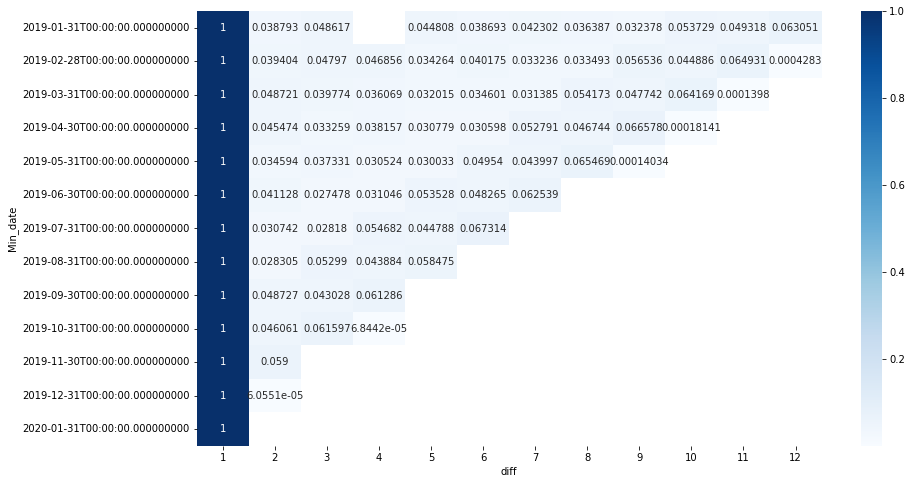

In [91]:
plt.subplots(figsize=(14,8))
sns.heatmap(cohort_table ,cmap='Blues' ,annot=True,fmt='.5g')
plt.show()

In [92]:
cohort_table1 = df.pivot_table(index = 'Min_date' ,columns = 'diff' ,values='Price Each' ,aggfunc='sum')
cohort_table1 = cohort_table1.div(cohort_table1[1],axis=0)

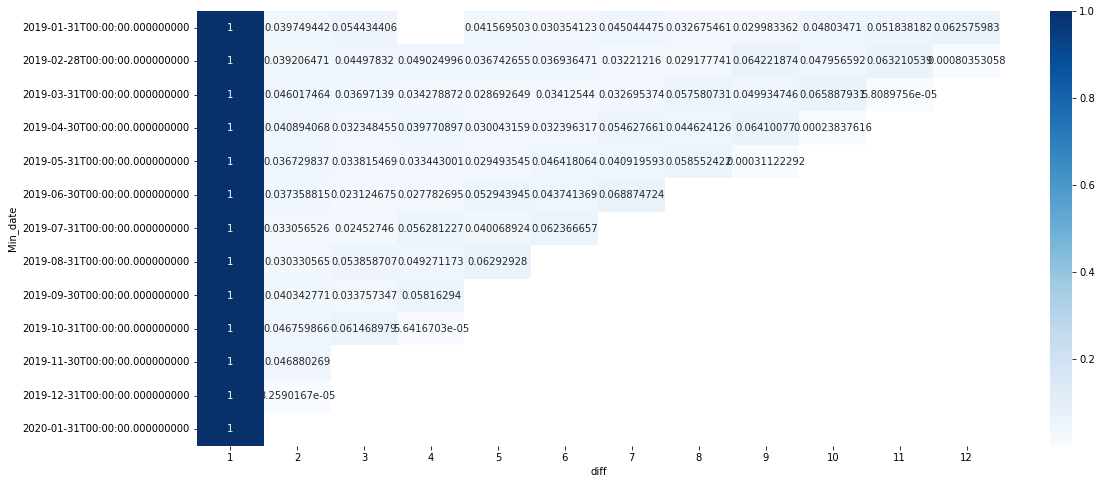

In [93]:
plt.subplots(figsize=(18,8))
sns.heatmap(cohort_table1 ,cmap='Blues' ,annot=True,fmt='.8g')
plt.show()

- We cannot keep customers for long !!

In [100]:
df['state']=df['state'].str.strip()
df['state'].unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

- dive deep into cohort table to gain more insights

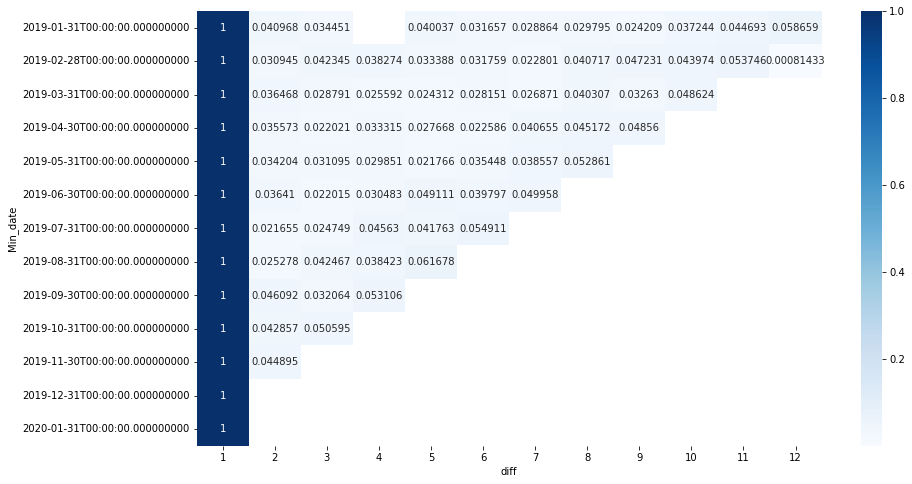

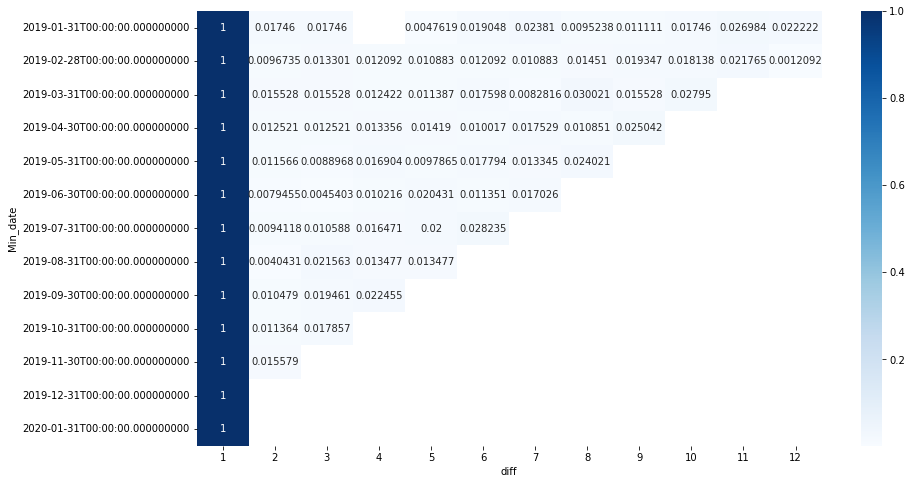

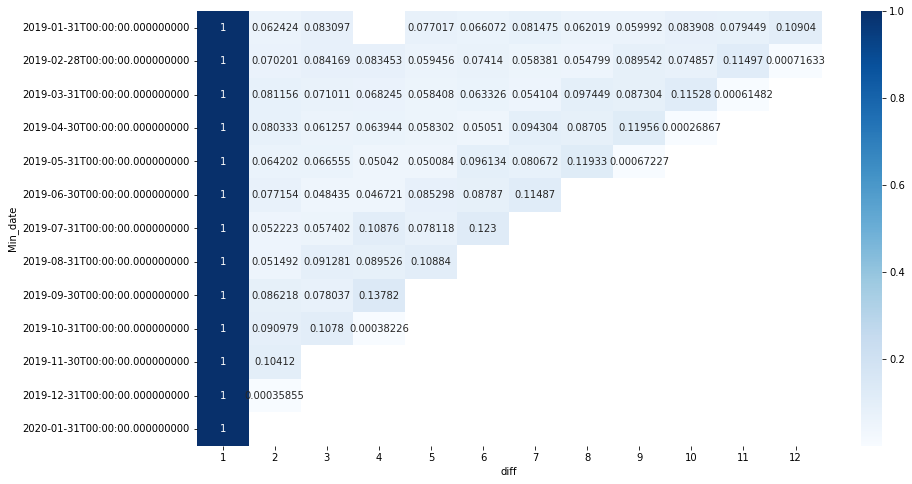

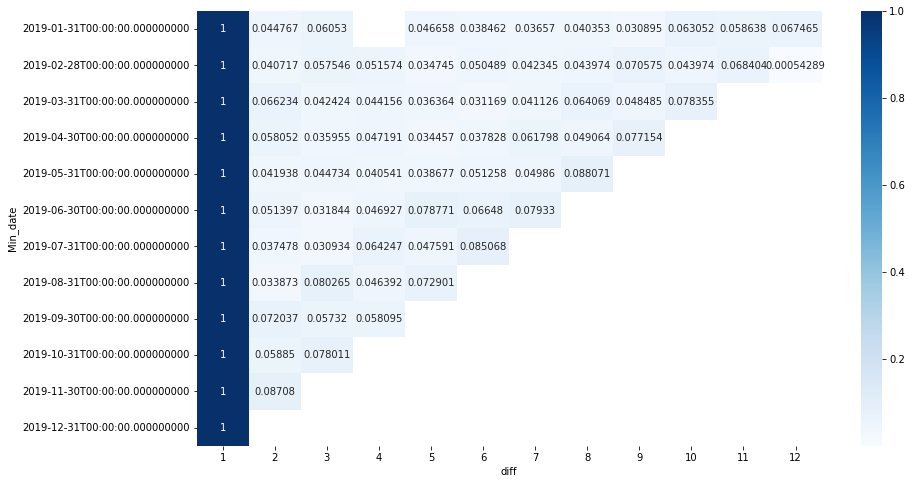

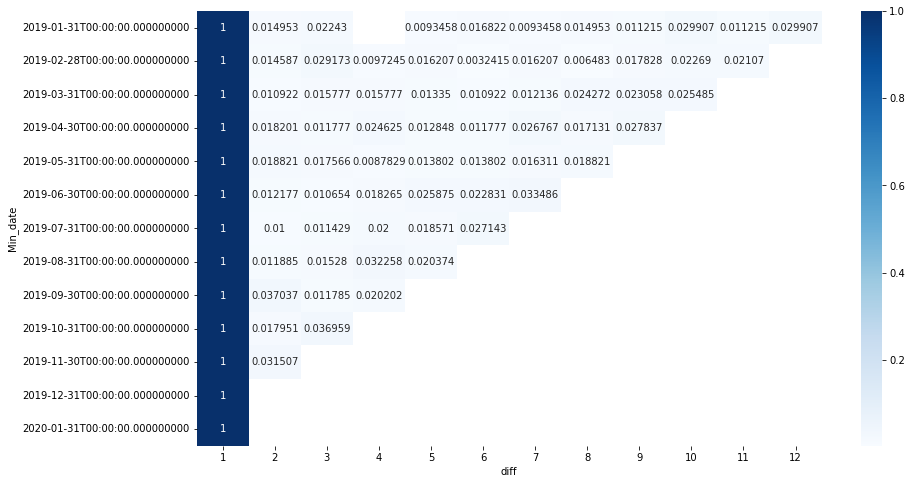

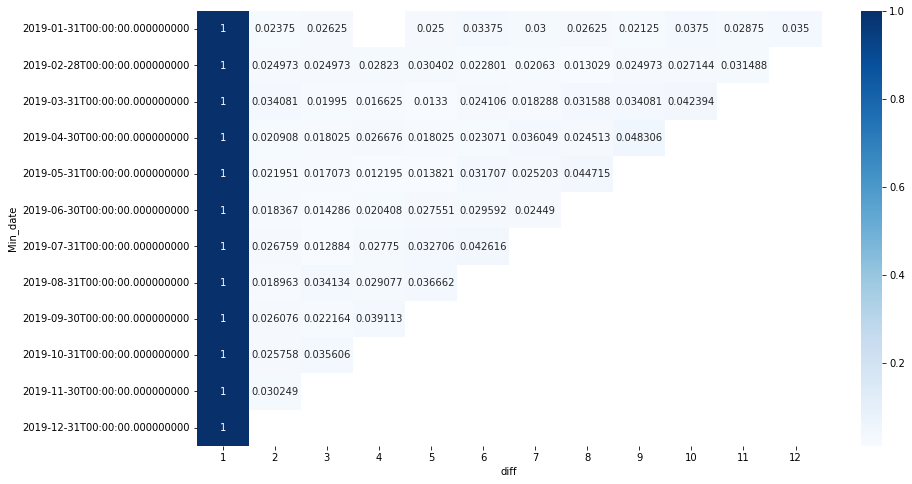

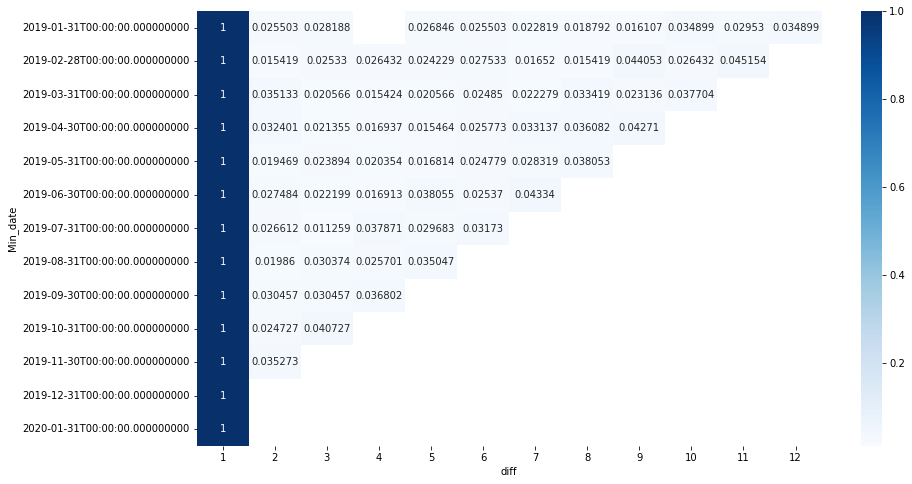

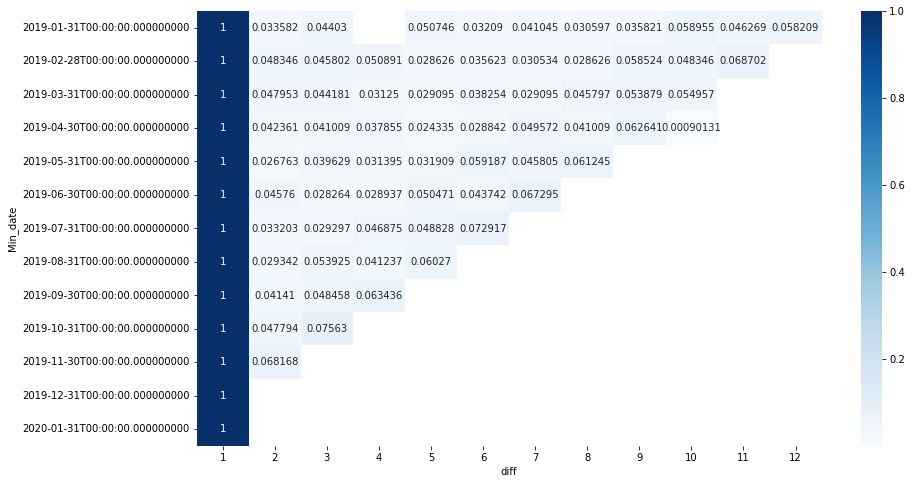

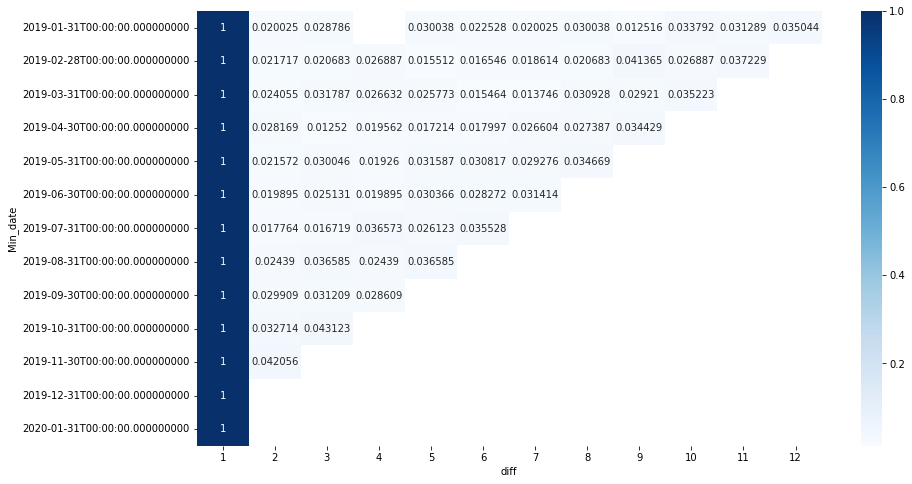

In [112]:
for _ in df['state'].unique():
    cohort_table = df.query(f"state == '{_}'").pivot_table(index = 'Min_date' ,columns = 'diff' ,values='Order ID' ,aggfunc='count')
    cohort_table = cohort_table.div(cohort_table[1],axis=0)
    plt.subplots(figsize=(14,8))
    sns.heatmap(cohort_table ,cmap='Blues' ,annot=True,fmt='.5g')
    plt.show()

- all states have the same thing ( We cannot keep customers for long !!)

# CLTV

In [198]:
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes import GammaGammaFitter,ModifiedBetaGeoFitter,BetaGeoBetaBinomFitter

In [122]:
T = summary_data_from_transaction_data(transactions=df ,customer_id_col='customer_id' ,datetime_col='Order Date' ,monetary_value_col='Price Each')

In [127]:
T = T.query("monetary_value > 0")

In [192]:
gamma = GammaGammaFitter(penalizer_coef=0.00001)

In [200]:
T.corr()

frequency   recency         T  monetary_value
frequency        1.000000  0.301791  0.155754        0.011661
recency          0.301791  1.000000  0.565643        0.009438
T                0.155754  0.565643  1.000000        0.009844
monetary_value   0.011661  0.009438  0.009844        1.000000

In [131]:
gamma.fit(T['frequency'] ,T['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 30724 subjects, p: 2.49, q: 0.44, v: 2.04>

In [203]:
mbg = ModifiedBetaGeoFitter(penalizer_coef=0.00001)

In [204]:
mbg.fit(T['frequency'],T['recency'],T['T'])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<lifetimes.ModifiedBetaGeoFitter: fitted with 30724 subjects, a: 0.00, alpha: 4839.27, b: 0.00, r: 25.24>

In [205]:
from lifetimes.plotting import plot_probability_alive_matrix

In [206]:
from lifetimes.plotting import plot_frequency_recency_matrix

In [207]:
from lifetimes.plotting import plot_expected_repeat_purchases

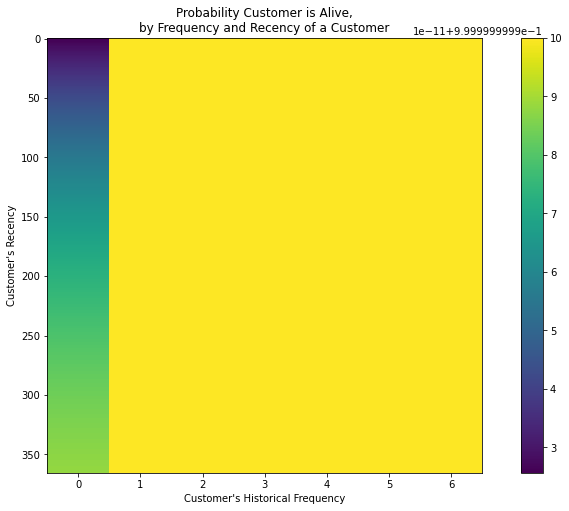

In [208]:
plt.subplots(figsize=(14,8))
plot_probability_alive_matrix(model=mbg)
plt.show()

- all customers have high probability about 0.99 that they will be alive
- (The ModifiedBetaGeoFitter model predicted that customers who stopped purchasing or continued purchasing would change their behavior in the future) and this is the explanation of this results

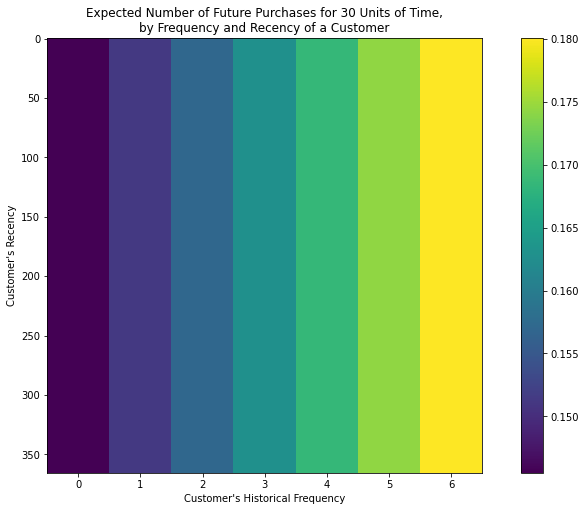

In [216]:
plt.subplots( figsize=(14, 8))
plot_frequency_recency_matrix(model=mbg, T=30 )
plt.show()

- customers who's frequency more than 5 have highest probability about 0.18 that will buy next 30 days 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


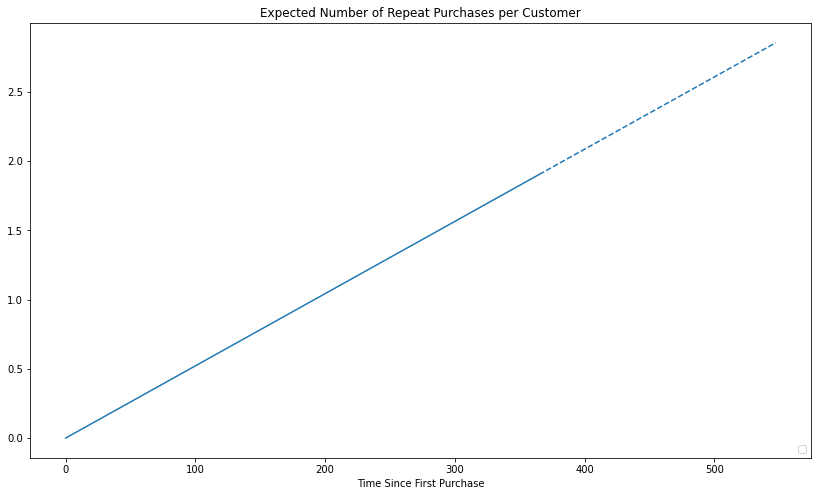

In [210]:
plt.subplots(figsize=(14, 8))
plot_expected_repeat_purchases(model=mbg)
plt.show()

- old customers ( more than 1 year ) have a chance to buy multiple times than new customers

In [224]:
gamma.fit(frequency=T['frequency'] ,monetary_value=T['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 30724 subjects, p: 11.35, q: 0.50, v: 0.56>

In [231]:
cltv = gamma.customer_lifetime_value(transaction_prediction_model=mbg ,frequency=T['frequency'] ,recency=T['recency'] ,T = T['T'] ,monetary_value = T['monetary_value'] ,time=1 ,discount_rate=0)

In [232]:
cltv

customer_id
5         285.824104
7           2.499445
18          1.990330
22          2.049728
25          0.710052
             ...    
140750     17.972122
140757      0.565830
140768     96.132788
140769      2.072777
140781      2.007943
Name: clv, Length: 30724, dtype: float64

In [236]:
states = df.groupby("customer_id")["state"].unique().apply(lambda x : x[0])

In [242]:
states = states.to_frame()

In [243]:
cltv = cltv.to_frame()

In [246]:
final_cltv = states.merge(cltv ,how = 'left',right_index=True ,left_index=True)

In [247]:
final_cltv = final_cltv.fillna(0)

In [258]:
final_cltv['clv']=final_cltv['clv']/final_cltv['clv'].max()

In [265]:
def groups(x):
    if x <= 0.00508:
        return 'weak'
    elif x > 0.00508 and x <= 0.0601:
        return 'medium'
    else :
        return 'strong'

In [269]:
final_cltv['clv_gro'] = final_cltv['clv'].apply(groups)

In [274]:
final_cltv.query("clv > 0")

state       clv clv_gro
customer_id                                 
5            San Francisco  0.708835  strong
7            New York City  0.006199  medium
18             Los Angeles  0.004936    weak
22           San Francisco  0.005083  medium
25             Los Angeles  0.001761    weak
...                    ...       ...     ...
140750         Los Angeles  0.044570  medium
140757         Los Angeles  0.001403    weak
140768         Los Angeles  0.238406  strong
140769       San Francisco  0.005140  medium
140781             Seattle  0.004980    weak

[30724 rows x 3 columns]

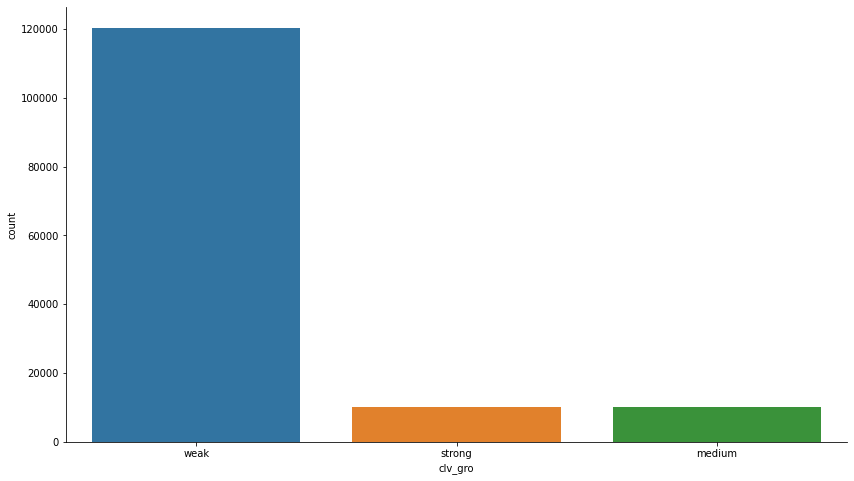

In [276]:
plt.subplots(figsize=(14,8))
sns.countplot(data=final_cltv ,x= 'clv_gro')
sns.despine()
plt.show()

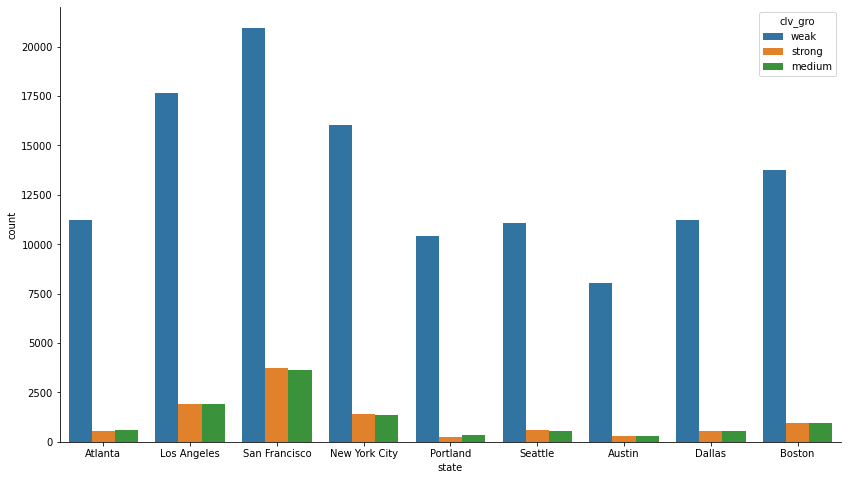

In [277]:
plt.subplots(figsize=(14,8))
sns.countplot(data=final_cltv ,x='state' ,hue = 'clv_gro')
sns.despine()
plt.show()

- based on the last two visualization ,most of our customers are weak ( have low CLTV for one month from now ) !!!
- While los Angeles & San Francisco and New York have highest numbers of weak customers but also have highest number of strong and medium customers

# States

In [279]:
import numpy as np

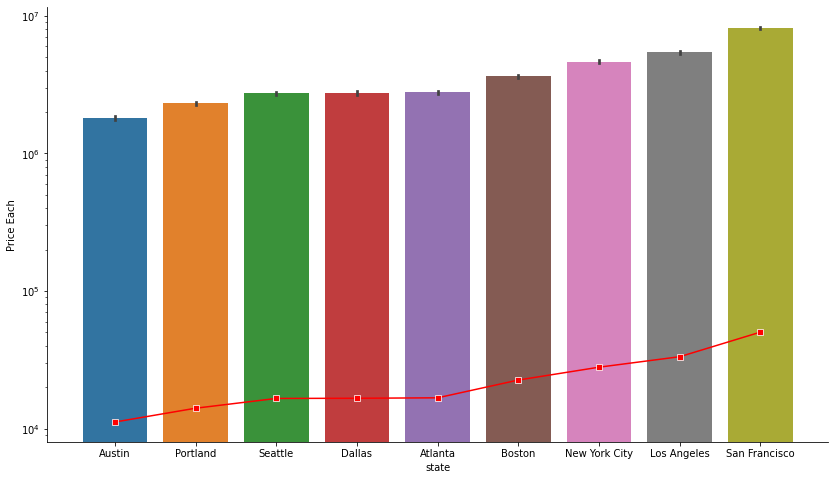

In [322]:
plt.subplots(figsize=(14,8))
sns.barplot(data = df ,x='state' ,y='Price Each' ,estimator=np.sum ,order=['Austin', 'Portland', 'Seattle', 'Dallas', 'Atlanta', 'Boston',
       'New York City', 'Los Angeles', 'San Francisco'])
sns.lineplot(data=df.groupby(["state"])['Quantity Ordered'].sum().sort_values().reset_index() ,x='state' ,y='Quantity Ordered' ,marker='s', color='red')
sns.despine()
plt.yscale('log')
plt.show()

- New York City, Los Angeles, San Francisco have the highest revenue also highest n-quantities

In [292]:
x = df.pivot_table(index = 'state' ,columns = 'Order Date1' ,values = 'Price Each' ,aggfunc='sum' ,margins=True)
x

Order Date1    2019-01-31 00:00:00  2019-02-28 00:00:00  2019-03-31 00:00:00  \
state                                                                          
Atlanta                  148523.69            175851.81            230134.86   
Austin                    87163.21            108325.58            153671.83   
Boston                   198912.69            213629.24            298970.37   
Dallas                   141158.53            185438.29            221205.40   
Los Angeles              285754.49            339637.47            427827.95   
New York City            256608.67            303046.15            365148.88   
Portland                 114310.51            148571.15            185649.95   
San Francisco            431292.63            544218.19            690363.85   
Seattle                  139540.56            170166.84            218234.74   
All                     1803264.98           2188884.72           2791207.83   

Order Date1    2019-04-30 00:00:00  2019-05-31 00:00:00  2019-06-30 00:00:00  \
state                                                                          
Atlanta                  282870.88            237572.66            218858.60   
Austin                   171487.65            159802.17            143193.06   
Boston                   351669.70            325999.80            252741.72   
Dallas                   250209.05            267131.07            185841.21   
Los Angeles              546855.97            497151.19            449351.78   
New York City            445252.65            433439.97            322462.56   
Portland                 238942.93            230922.52            168857.59   
San Francisco            805693.57            772384.31            607694.75   
Seattle                  274688.62            210721.44            213024.34   
All                     3367671.02           3135125.13           2562025.61   

Order Date1    2019-07-31 00:00:00  2019-08-31 00:00:00  2019-09-30 00:00:00  \
state                                                                          
Atlanta                  210979.19            168443.29            169923.85   
Austin                   149775.88            125146.00            105825.92   
Boston                   290151.72            236932.64            246591.73   
Dallas                   211201.99            178958.29            163076.03   
Los Angeles              392183.65            344302.64            352525.82   
New York City            353338.28            301152.88            298981.09   
Portland                 175397.95            151878.13            131816.96   
San Francisco            638095.00            535065.50            460938.06   
Seattle                  211415.90            188466.05            155312.63   
All                     2632539.56           2230345.42           2084992.09   

Order Date1    2019-10-31 00:00:00  2019-11-30 00:00:00  2019-12-31 00:00:00  \
state                                                                          
Atlanta                  304508.46            273143.85            359097.06   
Austin                   202100.25            170441.96            232440.12   
Boston                   364265.09            349623.53            506594.65   
Dallas                   321353.23            247127.45            378212.33   
Los Angeles              609228.15            496374.57            679241.56   
New York City            485336.03            425707.06            643612.89   
Portland                 252024.64            206659.16            302562.99   
San Francisco            861937.47            760902.41           1100501.11   
Seattle                  314801.51            250620.69            386152.70   
All                     3715554.83           3180600.68           4588415.41   

Order Date1    2020-01-31 00:00:00          All  
state                                            
Atlanta                        NaN   2779908.20  
Austin

In [299]:
x = x.div(x.iloc[-1,:])*100

In [303]:
x = round(x,2)

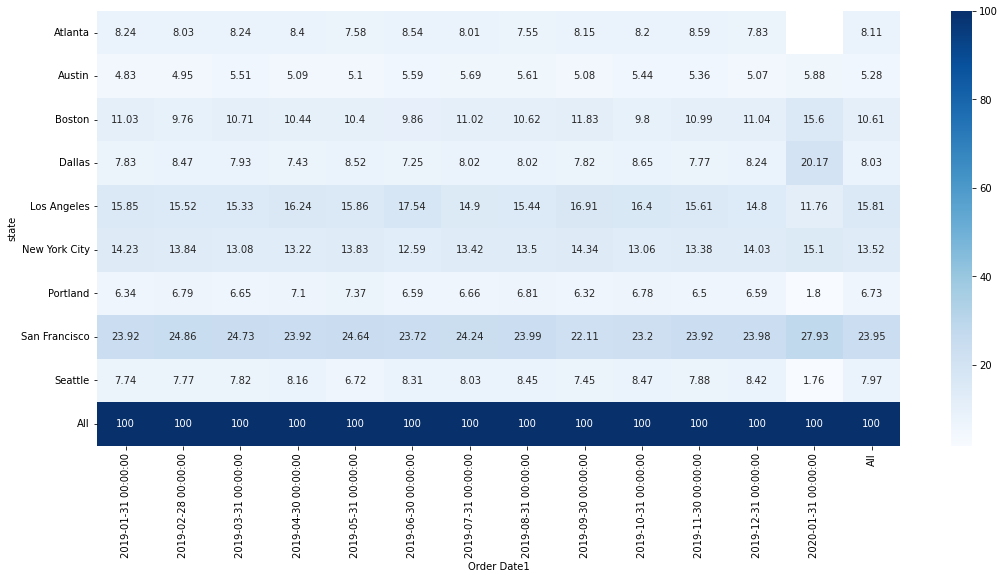

In [304]:
plt.subplots(figsize=(18,8))
sns.heatmap(x ,annot=True ,cmap='Blues',fmt='.8g')
plt.show()

- based on the previous visualization New York City, Los Angeles, San Francisco have the highest revenue for every month in a row
- while these states have highest n-weak customers but also have the highest revenue for every month in row !!
- also these states have highes n-strong and medium customers

In [306]:
df

Order Date  Order ID                     Product  \
0      2019-01-22 21:25:00    141234                      iPhone   
1      2019-01-28 14:15:00    141235    Lightning Charging Cable   
2      2019-01-17 13:33:00    141236            Wired Headphones   
3      2019-01-05 20:33:00    141237            27in FHD Monitor   
4      2019-01-25 11:59:00    141238            Wired Headphones   
...                    ...       ...                         ...   
185945 2019-12-11 20:58:00    319666    Lightning Charging Cable   
185946 2019-12-01 12:01:00    319667       AA Batteries (4-pack)   
185947 2019-12-09 06:43:00    319668             Vareebadd Phone   
185948 2019-12-03 10:39:00    319669            Wired Headphones   
185949 2019-12-21 21:45:00    319670  Bose SoundSport Headphones   

         Product_ean     catégorie  Quantity Ordered  Price Each  Cost price  \
0       5.638009e+12     Vêtements                 1      700.00    231.0000   
1       5.563320e+12  Alimentation                 1       14.95      7.4750   
2       2.113973e+12     Vêtements                 2       11.99      5.9950   
3       3.069157e+12        Sports                 1      149.99     97.4935   
4       9.692681e+12  Électronique                 1       11.99      5.9950   
...              ...           ...               ...         ...         ...   
185945  6.545974e+12  Électronique                 1       14.95      7.4750   
185946  5.352480e+12  Électronique                 2        3.84      1.9200   
185947  2.674213e+12  Alimentation                 1      400.00    132.0000   
185948  5.216304e+12  Alimentation                 1       11.99      5.9950   
185949  8.081038e+12  Électronique                 1       99.99     49.9950   

        turnover    margin  month  year Order Date1          state  \
0         700.00  469.0000      1  2019  2019-01-31         Boston   
1          14.95    7.4750      1  2019  2019-01-31       Portland   
2          23.98   11.9900      1  2019  2019-01-31  San Francisco   
3         149.99   52.4965      1  2019  2019-01-31    Los Angeles   
4          11.99    5.9950      1  2019  2019-01-31         Austin   
...          ...       ...    ...   ...         ...            ...   
185945     14.95    7.4750     12  2019  2019-12-31  San Francisco   
185946      7.68    3.8400     12  2019  2019-12-31    Los Angeles   
185947    400.00  268.0000     12  2019  2019-12-31        Seattle   
185948     11.99    5.9950     12  2019  2019-12-31         Dallas   
185949     99.99   49.9950     12  2019  2019-12-31    Los Angeles   

        customer_id   Min_date  diff  
0            132266 2019-01-31     1  
1             13519 2019-01-31     1  
2             68669 2019-01-31     1  
3             99824 2019-01-31     1  
4             44894 2019-01-31     1  
...             ...        ...   ...  
185945         6487 2019-12-31     1  
185946        70444 2019-05-31     8  
185947        27410 2019-12-31     1  
185948       106162 2019-12-31     1  
185949       101282 2019-12-31     1  

[185950 rows x 17 columns]

# My Insights
- The company cannot retain customers ,there are so many reasons to can't retain customers maybe the products or serives or marketing methods and so on ,i have no available data to say which one is the reason
- big portion of our customers are weak customers ,all states have weak customers with almost the same number ,but New York City, Los Angeles, San Francisco have highest portion of medium and strong customers which make them very important states and we can' focus our attention these states
- also these states have highest percentage of revenue over all months
- if i have more information about the customers i can give insights about which category of customers to target to gain more strong and medium customers
- all customers have a 0.19 to buy from us next month
- old customers ( more than 1 year ) will buy multiple times

# Product

## ABC Analysis

In [363]:
abc = df.groupby("Product")["Price Each"].sum().sort_values(ascending=False).reset_index()

In [367]:
abc['Price Each'].sum()

34289130.68000001

In [370]:
abc['portion']=abc['Price Each'] / abc['Price Each'].sum()

In [374]:
abc['cumsum']=abc['portion'].cumsum()

In [377]:
def seg(x):
    if x <= 0.8:
        return 'x'
    elif x >0.8 and x <=0.9:
        return 'y'
    else :
        return 'z'

In [379]:
abc['group']=abc['cumsum'].apply(seg)

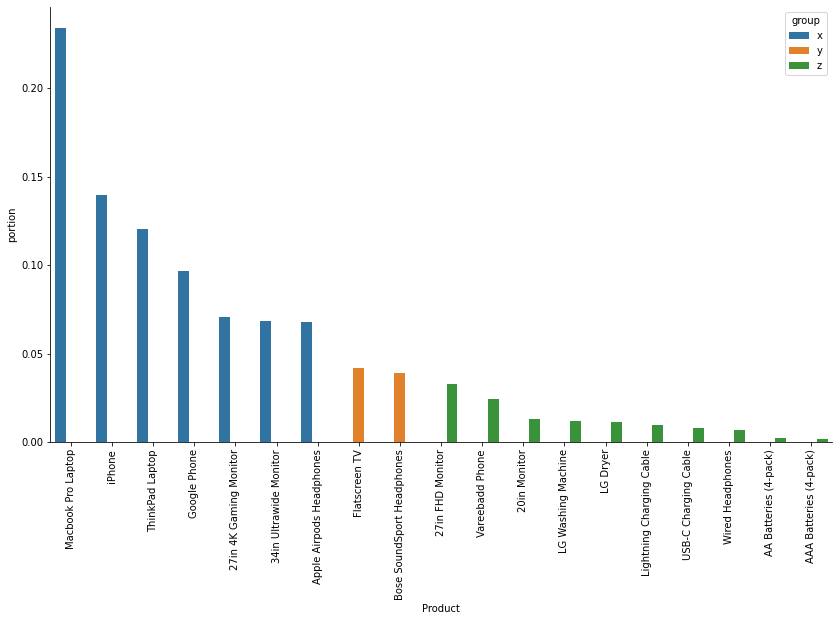

In [382]:
plt.subplots(figsize=(14,8))
sns.barplot(data=abc ,x='Product' ,y='portion' ,hue='group')
sns.despine()
plt.xticks(rotation=90)
plt.show()

In [387]:
abc_months = df.groupby(["Order Date1","Product"])["Price Each"].sum().reset_index()

In [392]:
abc_months['total']=abc_months.groupby("Order Date1")['Price Each'].transform('sum')

In [396]:
abc_months['portaion']=abc_months['Price Each'] /abc_months['total']

In [399]:
abc_months = abc_months.sort_values(by=['Order Date1','portaion'],ascending=[True ,False])

In [405]:
abc_months['cumsum']=abc_months.groupby("Order Date1")["portaion"].cumsum()

In [409]:
abc_months['group']=abc_months['cumsum'].apply(seg)

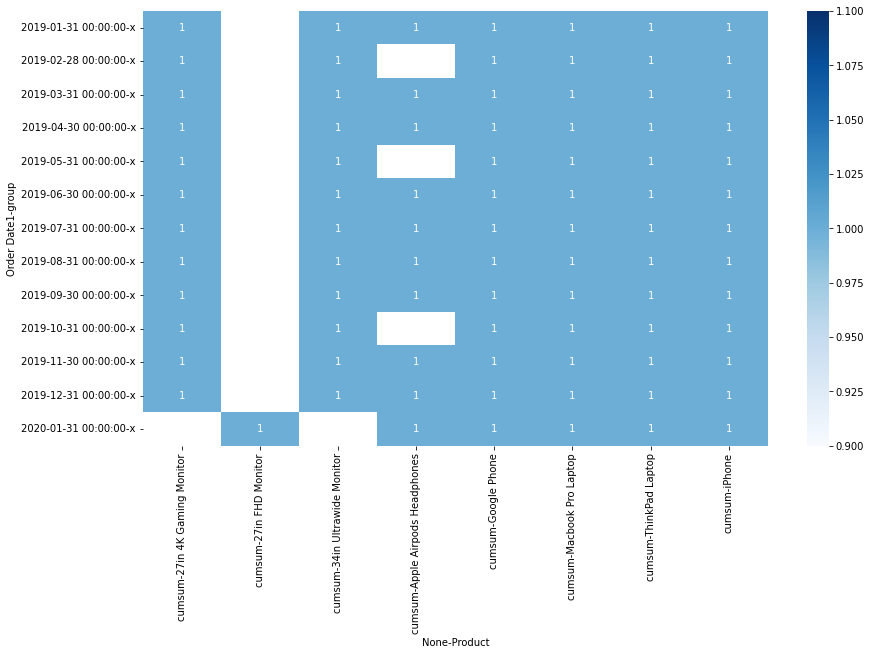

In [422]:
plt.subplots(figsize=(14,8))
sns.heatmap(abc_months[['Order Date1','Product','group','cumsum']].query("group == 'x'").pivot_table(index = ['Order Date1','group'],columns='Product' ,aggfunc='count'),cmap='Blues' ,annot=True)
plt.show()

- based on last two visualization ( Iphone ,Thinkpad Laptop ,Macbook Pro Labtop , Google Iphone ,27 in 4k gaming monitor ,apple airpoids headpohones and 34in ultrwide monitor get the big portion of profit every month and overall

In [446]:
target=df[df['Product'].isin(['27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor',
       'Apple Airpods Headphones', 'Google Phone', 'Macbook Pro Laptop',
       'ThinkPad Laptop', 'iPhone'])]

In [447]:
target=target.groupby(["state","Product"])['Price Each'].sum().reset_index().pivot_table(index='state' ,columns='Product' ,values='Price Each' ,aggfunc='sum',margins=True)

In [451]:
target=target.div(target.iloc[-1])

In [454]:
target=round(target,2)

In [455]:
target

Product        27in 4K Gaming Monitor  27in FHD Monitor  \
state                                                     
Atlanta                          0.08              0.08   
Austin                           0.05              0.05   
Boston                           0.11              0.11   
Dallas                           0.08              0.08   
Los Angeles                      0.16              0.16   
New York City                    0.13              0.14   
Portland                         0.07              0.07   
San Francisco                    0.23              0.24   
Seattle                          0.09              0.08   
All                              1.00              1.00   

Product        34in Ultrawide Monitor  Apple Airpods Headphones  Google Phone  \
state                                                                           
Atlanta                          0.08                      0.08          0.08   
Austin                           0.05                      0.06          0.05   
Boston                           0.11                      0.11          0.11   
Dallas                           0.08                      0.08          0.08   
Los Angeles                      0.15                      0.16          0.15   
New York City                    0.14                      0.13          0.14   
Portland                         0.07                      0.07          0.06   
San Francisco                    0.23                      0.24          0.25   
Seattle                          0.09                      0.08          0.08   
All                              1.00                      1.00          1.00   

Product        Macbook Pro Laptop  ThinkPad Laptop  iPhone   All  
state                                                             
Atlanta                      0.08             0.09    0.08  0.08  
Austin                       0.05             0.05    0.06  0.05  
Boston                       0.10             0.11    0.11  0.11  
Dallas                       0.08             0.08    0.08  0.08  
Los Angeles                  0.16             0.16    0.16  0.16  
New York City                0.14             0.14    0.13  0.14  
Portland                     0.07             0.07    0.07  0.07  
San Francisco                0.24             0.23    0.24  0.24  
Seattle                      0.08             0.08    0.08  0.08  
All                          1.00             1.00    1.00  1.00

- based on the previous table if we can San Francisco	& New York City	& Los Angeles & Boston sold the highest portion of revenue from 27in 4K Gaming Monitor	27in FHD Monitor	34in Ultrawide Monitor	Apple Airpods Headphones	Google Phone	Macbook Pro Laptop	ThinkPad Laptop	iPhone and these products are the most profitable products as we saw on the previous visualizations
- we can choose these areas to sell similar products rather than other areas

# Data Mining (Association Rule)

In [505]:
def dm(x):
    if x >=1:
        return 1
    else :
        return 0

In [503]:
basket = df.groupby(["Order ID","Product"]).apply(len).unstack()

In [504]:
basket.fillna(0,inplace=True)

In [508]:
basket = basket.applymap(dm)

In [509]:
basket.describe()

Product   20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
count    178437.000000           178437.000000     178437.000000   
mean          0.022966                0.034886          0.042020   
std           0.149796                0.183492          0.200636   
min           0.000000                0.000000          0.000000   
25%           0.000000                0.000000          0.000000   
50%           0.000000                0.000000          0.000000   
75%           0.000000                0.000000          0.000000   
max           1.000000                1.000000          1.000000   

Product  34in Ultrawide Monitor  AA Batteries (4-pack)  \
count             178437.000000          178437.000000   
mean                   0.034600               0.115122   
std                    0.182766               0.319170   
min                    0.000000               0.000000   
25%                    0.000000               0.000000   
50%                    0.000000               0.000000   
75%                    0.000000               0.000000   
max                    1.000000               1.000000   

Product  AAA Batteries (4-pack)  Apple Airpods Headphones  \
count             178437.000000             178437.000000   
mean                   0.115408                  0.087005   
std                    0.319514                  0.281844   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

Product  Bose SoundSport Headphones  Flatscreen TV   Google Phone  \
count                 178437.000000  178437.000000  178437.000000   
mean                       0.074525       0.026867       0.030946   
std                        0.262624       0.161694       0.173173   
min                        0.000000       0.000000       0.000000   
25%                        0.000000       0.000000       0.000000   
50%                        0.000000       0.000000       0.000000   
75%                        0.000000       0.000000       0.000000   
max                        1.000000       1.000000       1.000000   

Product      LG Dryer  LG Washing Machine  Lightning Charging Cable  \
count    178437.00000       178437.000000             178437.000000   
mean          0.00362            0.003732                  0.121074   
std           0.06006            0.060980                  0.326214   
min           0.00000            0.000000                  0.000000   
25%           0.00000            0.000000                  0.000000   
50%           0.00000            0.000000                  0.000000   
75%           0.00000            0.000000                  0.000000   
max           1.00000            1.000000                  1.000000   

Product  Macbook Pro Laptop  ThinkPad Laptop  USB-C Charging Cable  \
count         178437.000000    178437.000000         178437.000000   
mean               0.026458         0.023123              0.122480   
std                0.160492         0.150295              0.327841   
min                0.000000         0.000000              0.000000   
25%                0.000000         0.000000              0.000000   
50%                0.000000         0.000000              0.000000   
75%                0.000000         0.000000              0.000000   
max                1.000000         1.000000              1.000000   

Product  Vareebadd Phone  Wired Headphones         iPhone  
count      178437.000000     178437.000000  178437.000000  
mean            0.011573          0.105623       0.038333  
std             0.106953          0.307355       0.191999  
min             0.000000          0.000000       0.000000  
25%             0.000000          0.000000       0.000000  
50%             0.000000          0.000000       0.000000  
7

In [510]:
basket['total'] = basket.sum(axis=1)

In [511]:
basket = basket.query("total > 1")

In [512]:
basket.drop(columns = 'total',inplace=True)

In [513]:
basket = basket.replace([0,1],[False ,True])

In [514]:
basket

Product   20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
Order ID                                                           
141275           False                   False             False   
141290           False                   False             False   
141365           False                   False             False   
141384           False                   False             False   
141450           False                   False             False   
...                ...                     ...               ...   
319536           False                   False             False   
319556           False                   False             False   
319584           False                   False             False   
319596           False                   False             False   
319631           False                   False             False   

Product   34in Ultrawide Monitor  AA Batteries (4-pack)  \
Order ID                                                  
141275                     False                  False   
141290                     False                   True   
141365                     False                  False   
141384                     False                  False   
141450                     False                  False   
...                          ...                    ...   
319536                     False                  False   
319556                     False                  False   
319584                     False                  False   
319596                     False                  False   
319631                      True                  False   

Product   AAA Batteries (4-pack)  Apple Airpods Headphones  \
Order ID                                                     
141275                     False                     False   
141290                     False                      True   
141365                     False                     False   
141384                     False                     False   
141450                     False                     False   
...                          ...                       ...   
319536                     False                     False   
319556                     False                     False   
319584                     False                     False   
319596                     False                     False   
319631                     False                     False   

Product   Bose SoundSport Headphones  Flatscreen TV  Google Phone  LG Dryer  \
Order ID                                                                      
141275                         False          False         False     False   
141290                         False          False         False     False   
141365                         False          False         False     False   
141384                         False          False          True     False   
141450                          True          False          True     False   
...                              ...            ...           ...       ...   
319536                         False          False         False     False   
319556                         False          False          True     False   
319584                         False          False         False     False   
319596                         False          False         False     False   
319631                         False          False         False     False   

Product   LG Washing Machine  Lightning Charging Cable  Macbook Pro Laptop  \
Order ID                                                                     
141275                 False                     False               False   
141290                 False                     False               False   
141365                 False                     False               False   
141384                 False                     False               False   
141450                 False                

In [538]:
from mlxtend.frequent_patterns import fpgrowth ,association_rules

In [539]:
model = fpgrowth(df = basket ,min_support=0.05 ,use_colnames=True,verbose=10)

10 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (USB-C Charging Cable)
2 itemset(s) from tree conditioned on items (Wired Headphones)
0 itemset(s) from tree conditioned on items (Wired Headphones, iPhone)
0 itemset(s) from tree conditioned on items (Wired Headphones, Google Phone)
1 itemset(s) from tree conditioned on items (Apple Airpods Headphones)
0 itemset(s) from tree conditioned on items (AA Batteries (4-pack))
1 itemset(s) from tree conditioned on items (Vareebadd Phone)
1 itemset(s) from tree conditioned on items (Google Phone)
0 itemset(s) from tree conditioned on items (Bose SoundSport Headphones)
0 itemset(s) from tree conditioned on items (iPhone)
1 itemset(s) from tree conditioned on items (Lightning Charging Cable)
0 itemset(s) from tree conditioned on items (AAA Batteries (4-pack))


In [540]:
model

support                                 itemsets
0   0.295228                   (USB-C Charging Cable)
1   0.234924                       (Wired Headphones)
2   0.135539               (Apple Airpods Headphones)
3   0.102166                  (AA Batteries (4-pack))
4   0.087968                        (Vareebadd Phone)
5   0.239022                           (Google Phone)
6   0.112119             (Bose SoundSport Headphones)
7   0.272834                                 (iPhone)
8   0.252049               (Lightning Charging Cable)
9   0.105240                 (AAA Batteries (4-pack))
10  0.067623               (iPhone, Wired Headphones)
11  0.061768         (Wired Headphones, Google Phone)
12  0.054596       (iPhone, Apple Airpods Headphones)
13  0.053864  (USB-C Charging Cable, Vareebadd Phone)
14  0.145931     (USB-C Charging Cable, Google Phone)
15  0.147980       (iPhone, Lightning Charging Cable)

In [541]:
import MarketBaksetNetwork

In [542]:
from MarketBaksetNetwork import draw_network

In [546]:
relations = association_rules(df = model ,metric='lift' ,min_threshold=1)

In [549]:
relations = relations.query("confidence > 0.5")

In [550]:
relations

antecedents                 consequents  \
7            (Vareebadd Phone)      (USB-C Charging Cable)   
9               (Google Phone)      (USB-C Charging Cable)   
10                    (iPhone)  (Lightning Charging Cable)   
11  (Lightning Charging Cable)                    (iPhone)   

    antecedent support  consequent support   support  confidence      lift  \
7             0.087968            0.295228  0.053864    0.612313  2.074031   
9             0.239022            0.295228  0.145931    0.610533  2.068002   
10            0.272834            0.252049  0.147980    0.542382  2.151889   
11            0.252049            0.272834  0.147980    0.587108  2.151889   

    leverage  conviction  zhangs_metric  
7   0.027893    1.817887       0.567795  
9   0.075365    1.809579       0.678655  
10  0.079213    1.634444       0.736134  
11  0.079213    1.761154       0.715678

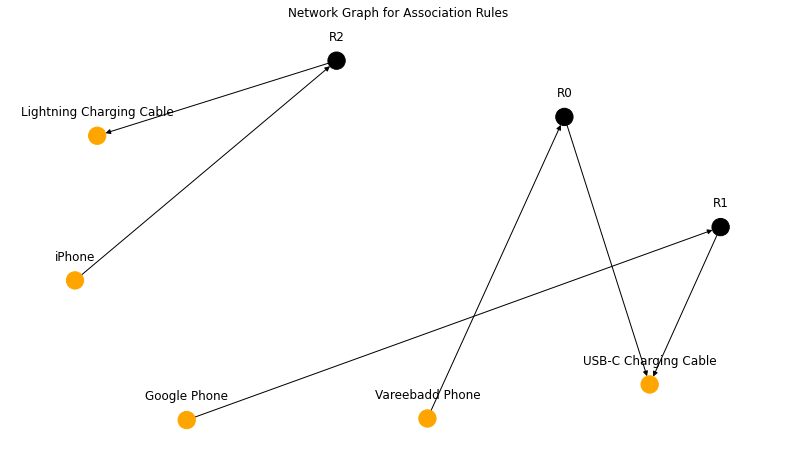

In [560]:
plt.subplots(figsize=(14,8))
draw_network(relations ,rules_to_show=3)

- Relation 1 : people who buy Vareebadd Phone are more likely to buy USB-C Charging Cable
- Relation 2 : people who buy Google Phone are more likely to buy USB-C Charging Cable
- Relation 3 : people who buy iPhone are more likely to buy Lightning Charging Cable

- we can cross sell 
- **iPhone with Lightning Charging Cable**
- **Vareebadd Phone ,Google Phone with USB-C Charging Cable**

In [565]:
df['Order Date2']=df['Order Date'].dt.to_period('D')

# Forecast next 7 days sells

In [567]:
time_series = df.groupby("Order Date2")["Price Each"].sum()

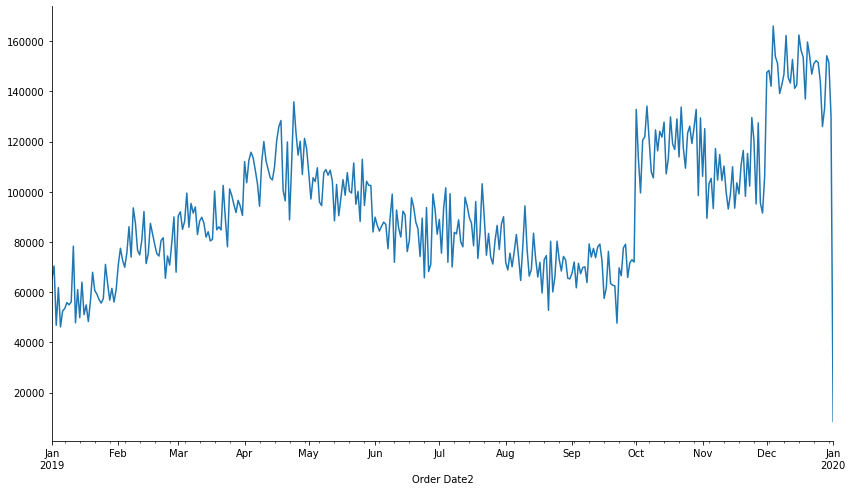

In [572]:
plt.subplots(figsize=(14,8))
time_series.plot()
sns.despine()
plt.show()

In [575]:
import RootsTimeSeries
from RootsTimeSeries import CharacteristicPlotter
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_white
from statsmodels.graphics.gofplots import qqplot
import statsmodels
import pmdarima
import skforecast
import sklearn
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [576]:
if adfuller(time_series)[1] <= 0.05:
    print(f"stationray:{adfuller(time_series)[1]}")
else :
    print("non stationray")

non stationray


In [578]:
if adfuller(time_series.diff().dropna())[1] <= 0.05:
    print(f"stationray:{adfuller(time_series.diff().dropna())[1]}")
else :
    print("non stationray")

stationray:7.142264907245654e-23


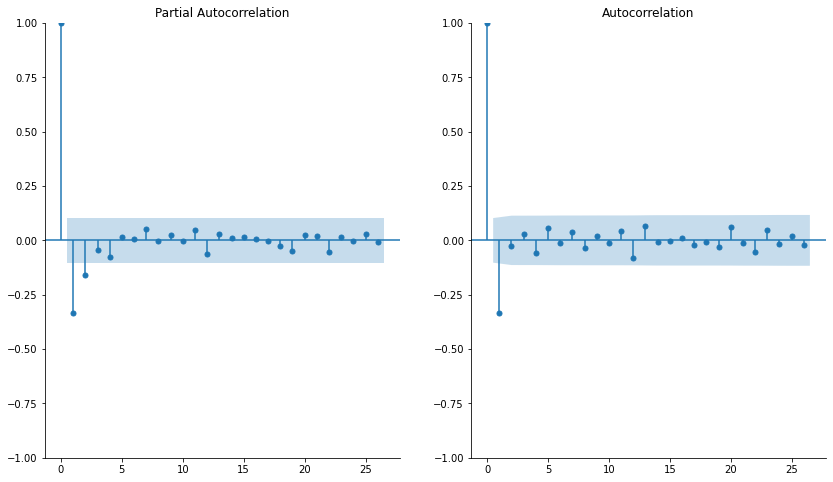

In [579]:
ax,(ax ,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(14,8))
plot_pacf(time_series.diff().dropna(),ax=ax)
plot_acf(time_series.diff().dropna(),ax=ax1)
sns.despine()

AR(1) ,MA(1)

In [603]:
time_series.index=time_series.index.to_timestamp()

In [604]:
# split train test cv
_ ,X_test = train_test_split(time_series ,train_size=0.8 ,test_size=0.2 ,shuffle=False)
X_train ,X_cv = train_test_split(_ ,train_size=0.8 ,test_size=0.2 ,shuffle=False)

In [605]:
# fit the mode
model = ARIMA(endog=X_train ,order=(1,0,1)).fit()

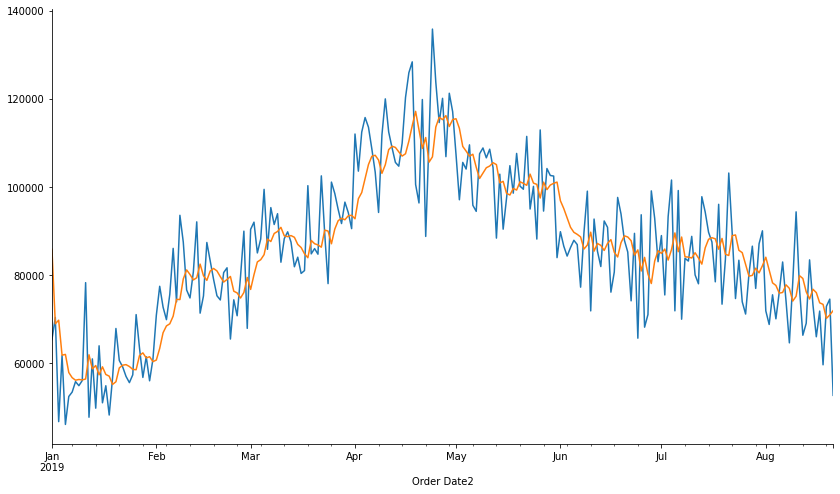

In [606]:
plt.subplots(figsize=(14,8))
X_train.plot(label='train')
model.predict().plot(label='forecast')
sns.despine()
plt.show()

In [607]:
# train score
train_score = r2_score(X_train ,model.predict())
train_score

0.7123195311128949

In [608]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()

In [609]:
# cv score Walk Forward Method
predictions = []
for _ in range(len(X_cv)):
    X_train1 = X_train1.append(X_cv.iloc[_:_+1])
    model1 = ARIMA(endog=X_train1 ,order=(1,0,1)).fit()
    predictions.append(model1.forecast().values[0])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [610]:
# test score Walk Forward Method
predictions1 = []
for _ in range(len(X_test)):
    X_train2 = X_train2.append(X_test.iloc[_:_+1])
    model2 = ARIMA(endog=X_train2 ,order=(1,0,1)).fit()
    predictions1.append(model2.forecast().values[0])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

In [611]:
train_score,r2_score(X_cv ,predictions),r2_score(X_test ,predictions1)

(0.7123195311128949, 0.8601769713874752, 0.681992099389361)

- wow the model do better on unseen data on CV data and Test closes to train !!

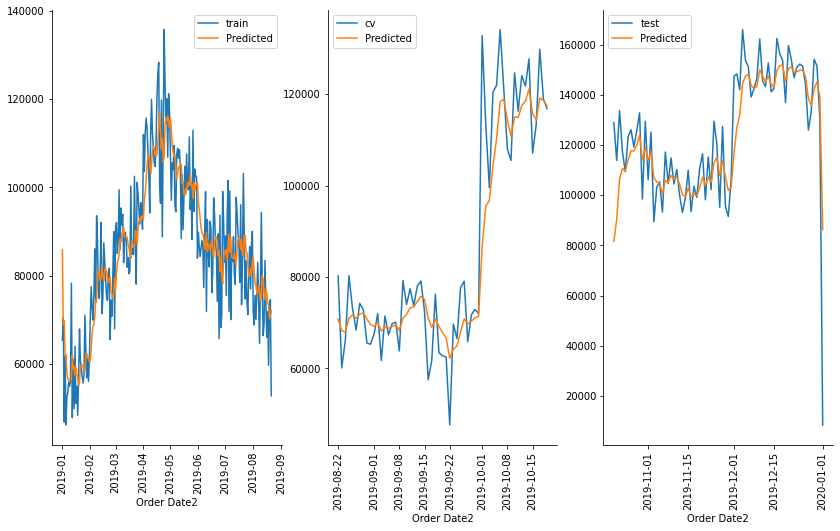

In [614]:
fig, (ax, ax1 ,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting on the first subplot
sns.lineplot(x=X_test.index, y=X_test.values, ax=ax2, label='test')
sns.lineplot(x=X_test.index, y=predictions1, ax=ax2, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_cv.index, y=X_cv.values, ax=ax1, label='cv')
sns.lineplot(x=X_cv.index, y=predictions, ax=ax1, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_train.index, y=X_train.values, ax=ax, label='train')
sns.lineplot(x=X_train.index, y=model.predict().values, ax=ax, label='Predicted')

# Adding legends
ax1.legend()
ax2.legend()
ax.legend()
sns.despine()
ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
# Display the plots
plt.show()

In [615]:
model_auto = auto_arima(y = X_train ,start_p=1 ,start_q= 1 ,max_p= 3 ,max_q=3 ,seasonal=False)

In [623]:
model_auto

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [617]:
# new model
# fit the mode
X_train3 = X_train.copy()
X_train4 = X_train.copy()
new_model = ARIMA(endog=X_train ,order=(0,1,1)).fit()
# cv score Walk Forward Method
predictions2 = []
for _ in range(len(X_cv)):
    X_train3 = X_train3.append(X_cv.iloc[_:_+1])
    new_model1 = ARIMA(endog=X_train3 ,order=(0,1,1)).fit()
    predictions2.append(new_model1.forecast().values[0])
# test score Walk Forward Method
predictions3 = []
for _ in range(len(X_test)):
    X_train4 = X_train4.append(X_test.iloc[_:_+1])
    new_model2 = ARIMA(endog=X_train4 ,order=(0,1,1)).fit()
    predictions3.append(new_model2.forecast().values[0])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pred

In [618]:
r2_score(X_train ,new_model.predict()),r2_score(X_cv ,predictions2),r2_score(X_test ,predictions3)

(0.6461331426790304, 0.8634950082876237, 0.6777327275799437)

this model do better on generalization than first model

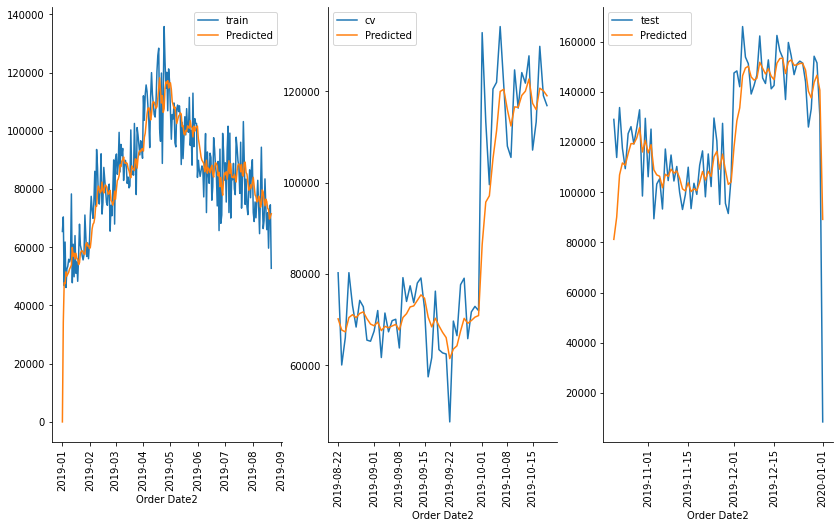

In [619]:
fig, (ax, ax1 ,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting on the first subplot
sns.lineplot(x=X_test.index, y=X_test.values, ax=ax2, label='test')
sns.lineplot(x=X_test.index, y=predictions3, ax=ax2, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_cv.index, y=X_cv.values, ax=ax1, label='cv')
sns.lineplot(x=X_cv.index, y=predictions2, ax=ax1, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_train.index, y=X_train.values, ax=ax, label='train')
sns.lineplot(x=X_train.index, y=new_model.predict().values, ax=ax, label='Predicted')

# Adding legends
ax1.legend()
ax2.legend()
ax.legend()
sns.despine()
ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
# Display the plots
plt.show()


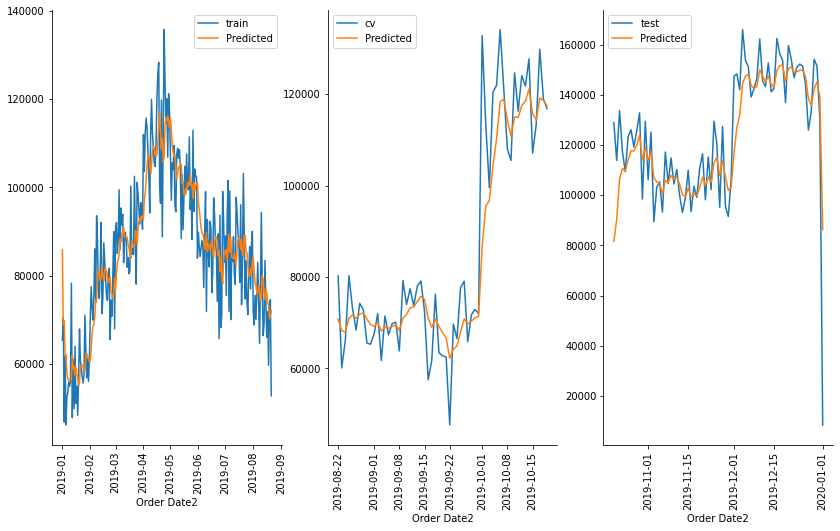

In [620]:
fig, (ax, ax1 ,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting on the first subplot
sns.lineplot(x=X_test.index, y=X_test.values, ax=ax2, label='test')
sns.lineplot(x=X_test.index, y=predictions1, ax=ax2, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_cv.index, y=X_cv.values, ax=ax1, label='cv')
sns.lineplot(x=X_cv.index, y=predictions, ax=ax1, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_train.index, y=X_train.values, ax=ax, label='train')
sns.lineplot(x=X_train.index, y=model.predict().values, ax=ax, label='Predicted')

# Adding legends
ax1.legend()
ax2.legend()
ax.legend()
sns.despine()
ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
# Display the plots
plt.show()


In [624]:
import RootsTimeSeries
from RootsTimeSeries import CharacteristicPlotter
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_white ,het_arch
from statsmodels.graphics.gofplots import qqplot

In [626]:
model.params[2]

(0.9918325978063867, -0.7525016041380406)

In [629]:
params = [[model.params[1]],[model.params[2]]]

In [630]:
checks1 = CharacteristicPlotter(coef=params ,ar_ma='ar_ma')

stationary : True 
invertible : True 


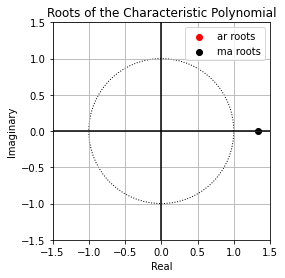

In [631]:
checks1.plot_roots()

In [632]:
shapiro(model.resid)[1],shapiro(new_model.resid)[1]

(0.4571443796157837, 4.6702254508090846e-08)

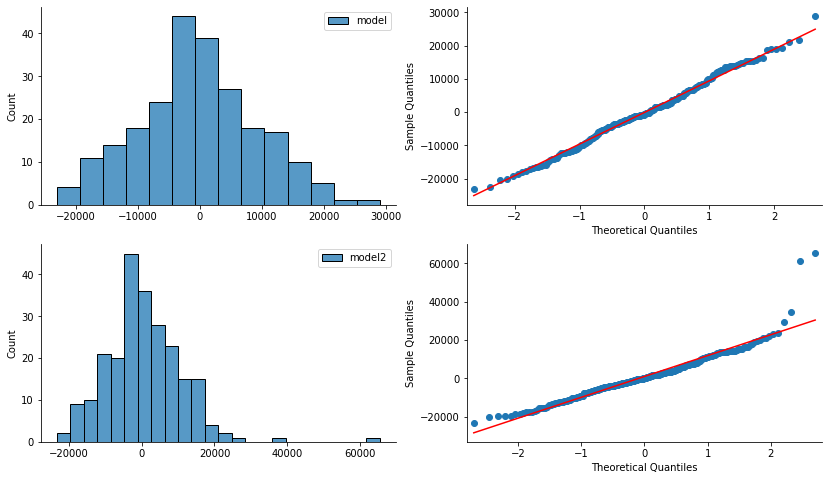

In [634]:
fig,(ax,ax1)=plt.subplots(nrows=2,ncols=2,figsize=(14,8))
sns.histplot(model.resid,ax=ax[0] ,label='model')
sns.histplot(new_model.resid,ax=ax1[0],label='model2')
qqplot(model.resid,ax=ax[1] ,label='model',line='s')
qqplot(new_model1.resid,ax=ax1[1],label='model2',line='s')
sns.despine()
ax[0].legend()
ax1[0].legend()
plt.show()

In [635]:
if durbin_watson(model.resid) <= 2.1 and durbin_watson(model.resid) >= 1.9 :
    print('no first order autocorrelation')
else:
    print('first order autocorrelation')

no first order autocorrelation


In [636]:
if durbin_watson(new_model.resid) <= 2.1 and durbin_watson(new_model.resid) >= 1.9 :
    print('no first order autocorrelation')
else:
    print('first order autocorrelation')

first order autocorrelation


In [639]:
acorr_ljungbox(model.resid,lags=5)['lb_pvalue'].values,acorr_ljungbox(new_model.resid,lags=5)['lb_pvalue'].values

(array([0.6642226 , 0.85085964, 0.70492698, 0.84373753, 0.92402212]),
 array([0.3414813 , 0.55313309, 0.42846029, 0.57551609, 0.71349413]))

- no high order autocorrelation till 5 lags

- first model is better than second model

In [646]:
# forecast 7 points using recursive method
new_model_final = ARIMA(endog=time_series ,order=(0,1,1)).fit()
time_series.append(new_model_final.forecast(steps=7))

2019-01-01    65420.910000
2019-01-02    70407.840000
2019-01-03    46793.740000
2019-01-04    61779.510000
2019-01-05    46160.620000
                  ...     
2020-01-04    92151.573015
2020-01-05    92151.573015
2020-01-06    92151.573015
2020-01-07    92151.573015
2020-01-08    92151.573015
Freq: D, Length: 373, dtype: float64

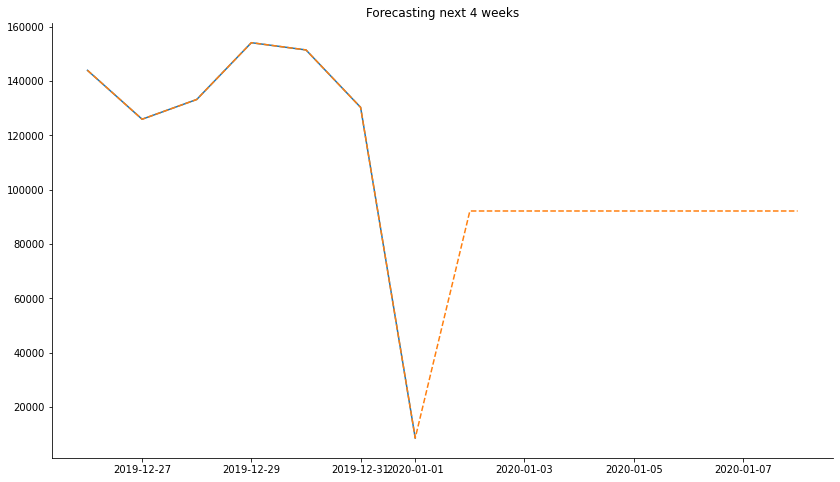

In [649]:
plt.subplots(figsize=(14,8))
plt.plot(time_series[-7:])
plt.plot(time_series.append(new_model_final.forecast(steps=7))[-14:],'--')
sns.despine()
plt.title("Forecasting next 4 weeks")
plt.show()

- the forecast line die because recursive method based on predictions ,predictions have some error term and when forecasting recursively we gain more error on the previous error of the previous point so this method isn't good

# Direct Method

In [654]:
for _ in range(1,150,1):
    mod = ForecasterAutoregDirect(regressor=LinearRegression() ,steps = 7 ,lags=_)
    mod.fit(X_train)
    print(r2_score(X_cv.iloc[:7].values,mod.predict().values),_)

-2.151254054856309 1
-0.42260733390226757 2
-0.13729987215929462 3
-0.31226929475993925 4
-0.2507792317684303 5
-0.25702278775503307 6
-0.1566357883821632 7
-0.14354521125239939 8
-0.08719138136947446 9
-0.0628755302165851 10
-0.007681173672709152 11
-0.40452355662884343 12
-0.3732350878556232 13
-0.42544533931136597 14
-0.42771074908205753 15
-0.500343355197421 16
-0.512845170459588 17
-0.424909540339804 18
-0.3755096542251595 19
-0.4598393971152801 20
-0.45581065099983564 21
-0.61198474312898 22
-0.6974699100544388 23
-0.7280709176620441 24
-0.8049961379233492 25
-0.7612786017898687 26
-0.6781809945300699 27
-0.6026298326962067 28
-0.6348594972144164 29
-0.5337880631531913 30
-0.7255977426492293 31
-0.934099041587364 32
-1.2200240123601662 33
-1.147864914371251 34
-1.135066715030392 35
-1.2721067942577218 36
-1.2781015707742251 37
-1.3067300106421063 38
-1.2416161696843284 39
-1.391612467603264 40
-1.2596775418569757 41
-1.4256234507951207 42
-1.390763770081274 43
-1.3912970121344261

In [672]:
mod = ForecasterAutoregDirect(regressor=LinearRegression() ,steps = 7 ,lags=12)

In [673]:
mod.fit(X_train)

<AxesSubplot:xlabel='Order Date2'>

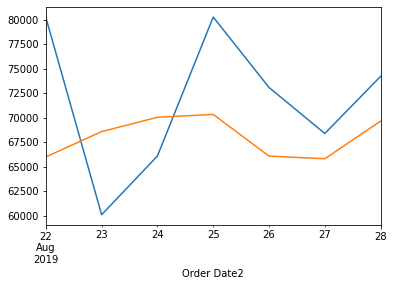

In [674]:
X_cv.iloc[:7].plot()
mod.predict().plot()

this method isn't good ,i can use non linear model to capture more complex relation

In [681]:
import lightgbm
import xgboost
import catboost

In [682]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [677]:
for _ in range(1,20,1):
    mod = ForecasterAutoregDirect(regressor=LGBMRegressor(random_state=0) ,steps = 7 ,lags=_)
    mod.fit(X_train)
    print(r2_score(X_cv.iloc[:7].values,mod.predict().values),_)

-2.605092634271937 1
-0.590586794170475 2
0.30284228012024617 3
-0.17571585634025277 4
-0.14787494078216357 5
-0.3483119058843649 6
-0.3223297303387971 7
-0.0822019061889343 8
0.14212159083446008 9
0.2792531738702769 10
0.03436860402601938 11
-0.14045345717596924 12
-0.3008839671997221 13
-0.2619015186858109 14
0.1841655008048435 15
-0.16333372565882498 16
0.05778642260367772 17
-0.36563928177340443 18
-0.07165292320937078 19


In [680]:
for _ in range(1,20,1):
    mod = ForecasterAutoregDirect(regressor=XGBRegressor(random_state=0) ,steps = 7 ,lags=_)
    mod.fit(X_train)
    print(r2_score(X_cv.iloc[:7].values,mod.predict().values),_)

-4.683889161863324 1
-2.1698883695813134 2
-1.8007475652170366 3
-0.9717920789410659 4
-0.8654299340742153 5
-0.15954545914923535 6
-1.272109457146267 7
0.29386573867806176 8
-0.13066636604543191 9
0.47967224372468653 10
0.5188539870011358 11
-0.32414254039842527 12
-0.25267380382320725 13
-0.5455551602734832 14
-0.1994447674365698 15
-0.9590458671668733 16
-0.7264633107128671 17
-0.7834277585951652 18
-0.07719442304788982 19


In [683]:
for _ in range(1,20,1):
    mod = ForecasterAutoregDirect(regressor=CatBoostRegressor(random_state=0) ,steps = 7 ,lags=_)
    mod.fit(X_train)
    print(r2_score(X_cv.iloc[:7].values,mod.predict().values),_)

-4.176834933936596 1
-1.6600386500110926 2
-0.3566079123118393 3
-0.14008101947779728 4
-0.018524897271272378 5
0.022164404829809303 6
-0.054877116791302916 7
-0.36061452869335486 8
-0.05256705833257702 9
-0.03740795722274326 10
-0.08860242345642244 11
-0.5253673936846301 12
-0.5024780217323075 13
-0.9161020993339637 14
-0.8066366794294093 15
-0.6556217795503541 16
-0.5057646645903662 17
-0.4259435314376747 18
-0.4026432605123147 19


In [686]:
m = X_train.max()

In [691]:
Xt = X_train/m
Xc = X_cv/m

-2.151254054856313 1


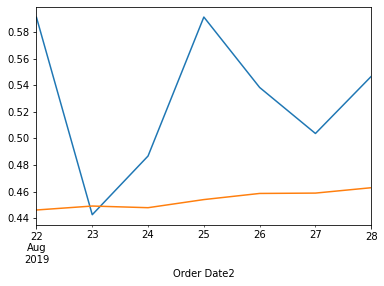

-0.42260733390226424 2


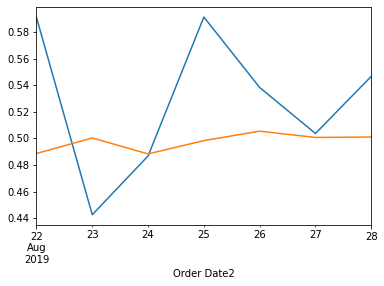

-0.13729987215929773 3


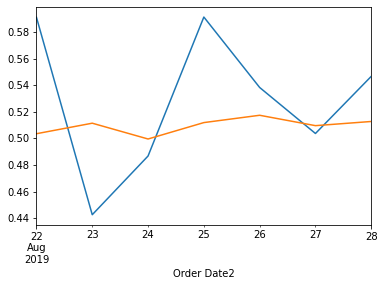

-0.3122692947599419 4


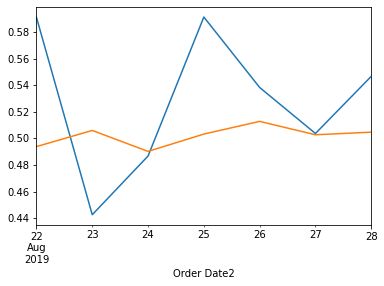

-0.25077923176843275 5


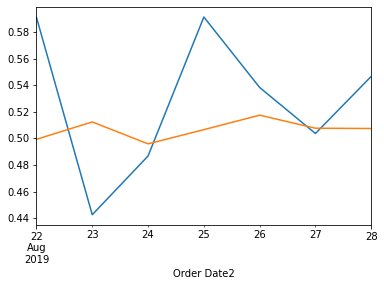

-0.25702278775502996 6


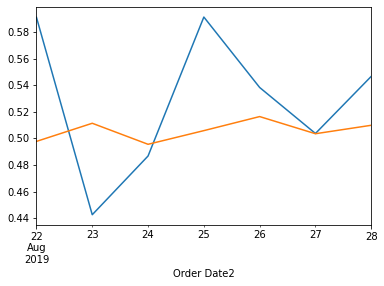

-0.15663578838216563 7


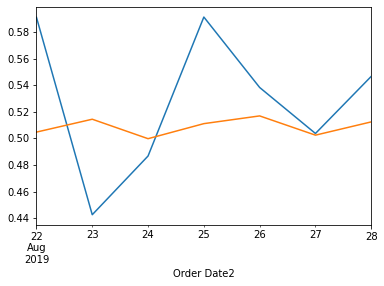

-0.14354521125239983 8


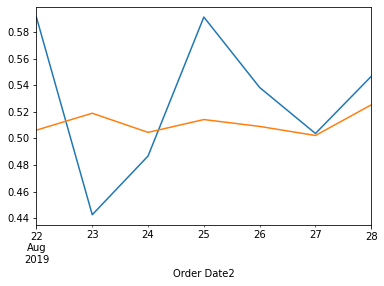

-0.08719138136947446 9


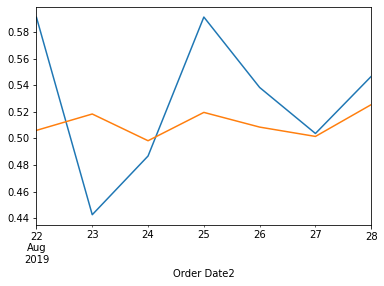

-0.06287553021658399 10


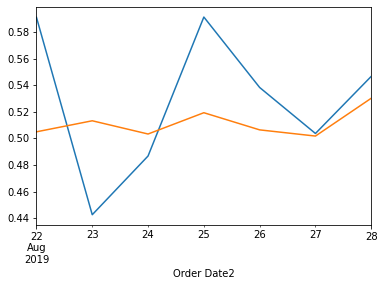

-0.007681173672710262 11


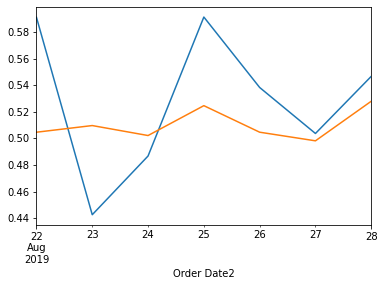

-0.40452355662884676 12


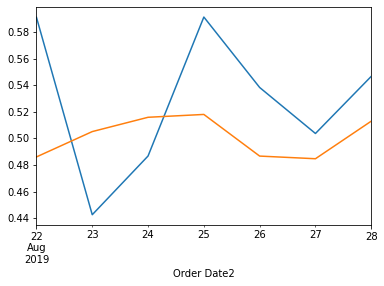

-0.37323508785562765 13


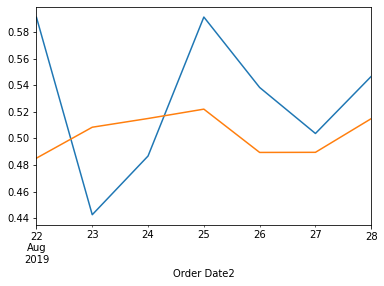

-0.4254453393113655 14


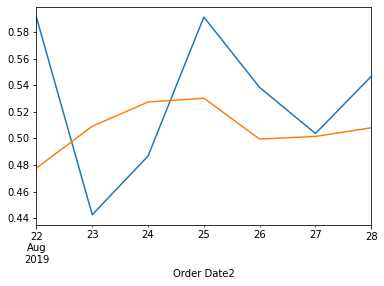

-0.42771074908205287 15


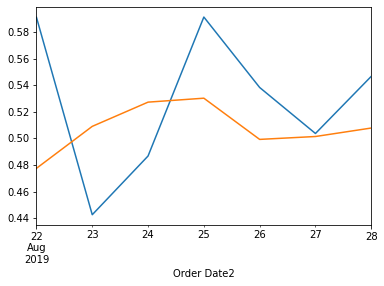

-0.5003433551974188 16


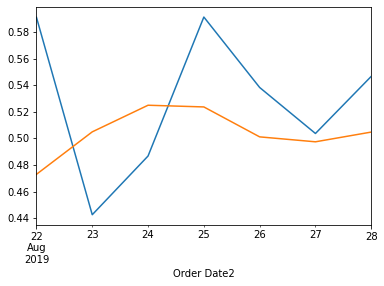

-0.5128451704595891 17


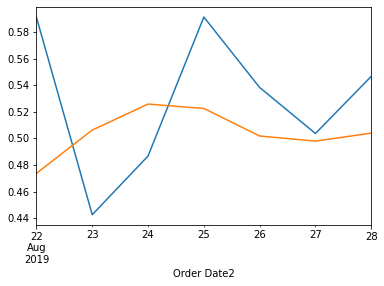

-0.42490954033980644 18


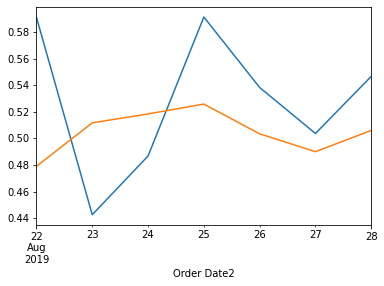

-0.3755096542251597 19


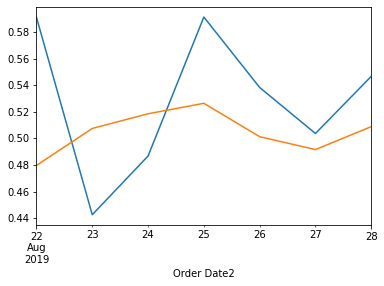

-0.45983939711527433 20


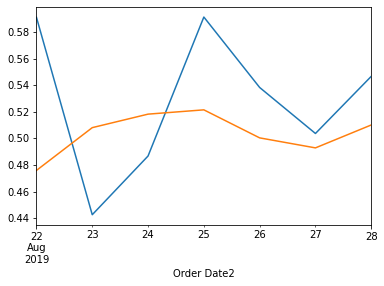

-0.4558106509998352 21


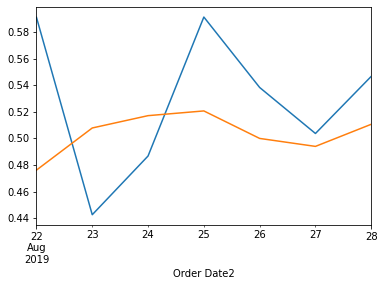

-0.6119847431289789 22


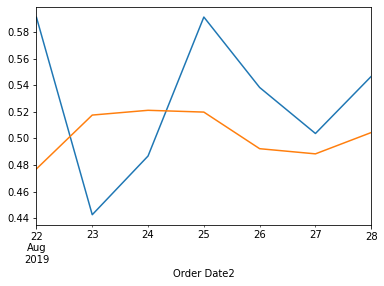

-0.6974699100544401 23


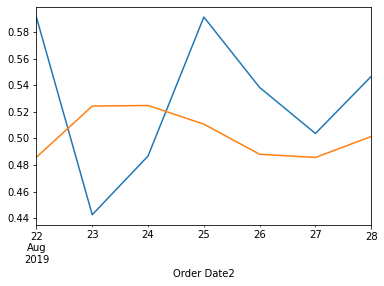

-0.7280709176620481 24


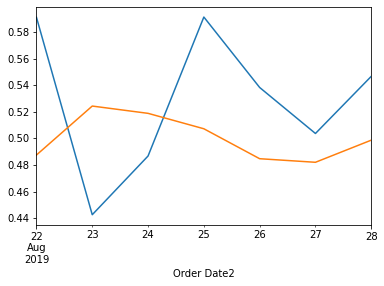

-0.804996137923343 25


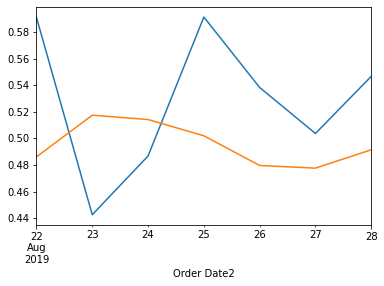

-0.7612786017898607 26


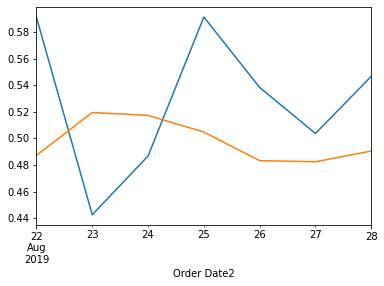

-0.6781809945300623 27


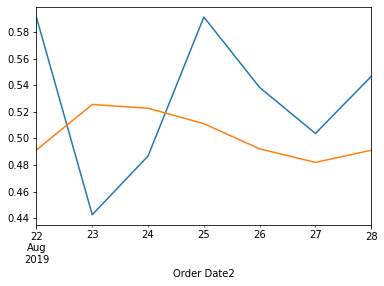

-0.6026298326962074 28


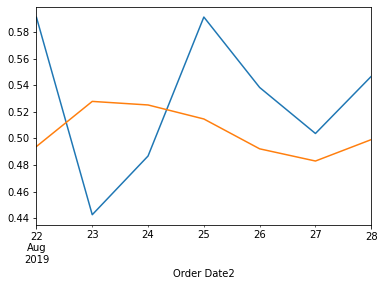

-0.6348594972144177 29


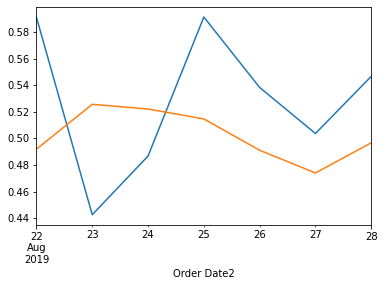

-0.533788063153189 30


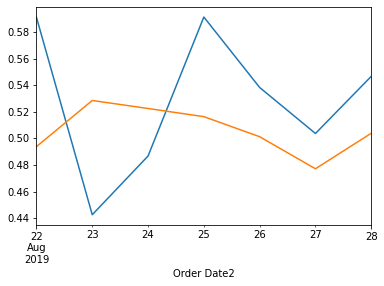

-0.725597742649229 31


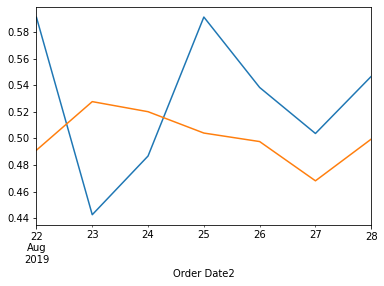

-0.9340990415873653 32


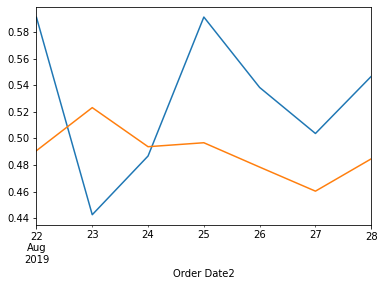

-1.2200240123601644 33


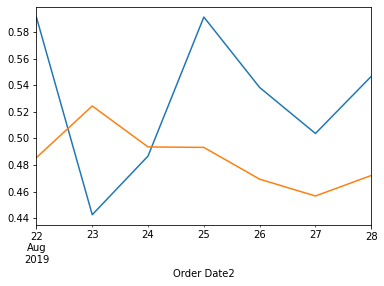

-1.147864914371246 34


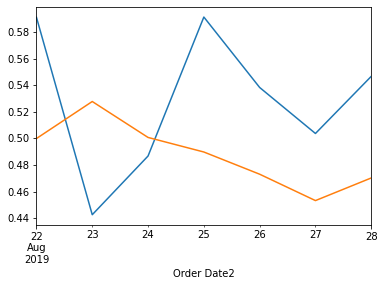

-1.1350667150303932 35


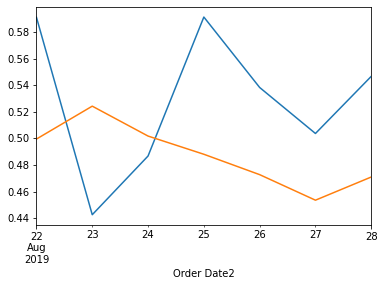

-1.2721067942577196 36


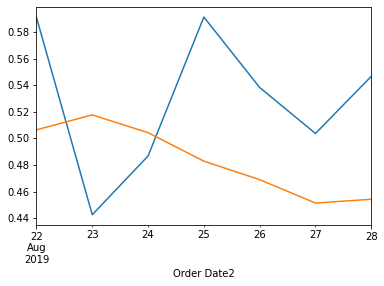

-1.2781015707742225 37


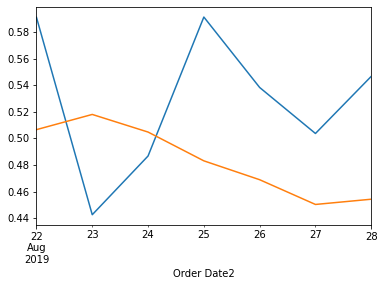

-1.3067300106421063 38


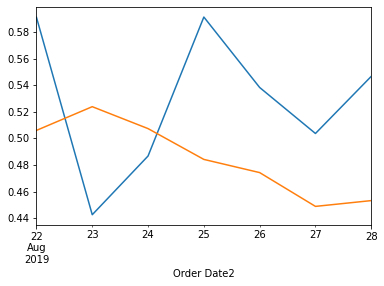

-1.241616169684331 39


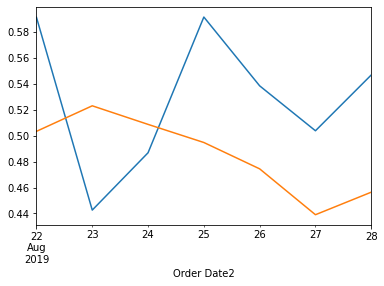

-1.391612467603275 40


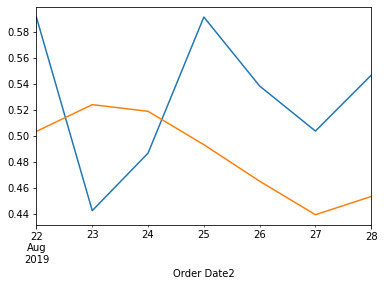

-1.259677541856988 41


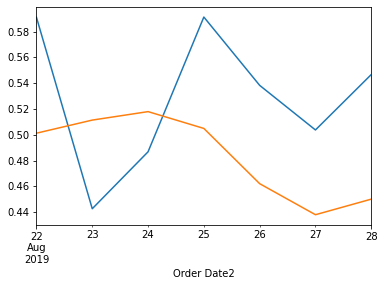

-1.4256234507951278 42


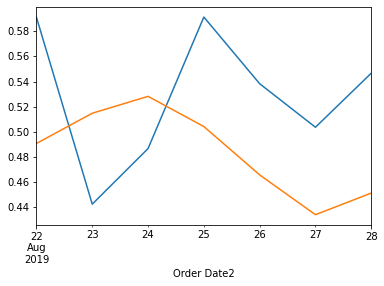

-1.3907637700812878 43


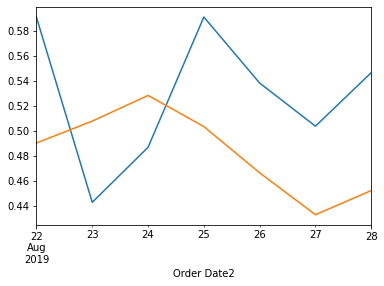

-1.3912970121344403 44


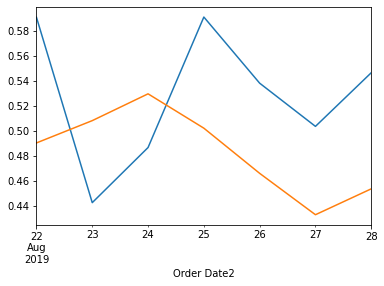

-1.6349453185537994 45


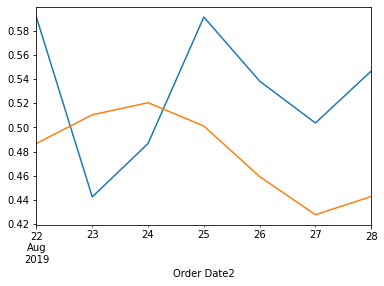

-1.7165944616676456 46


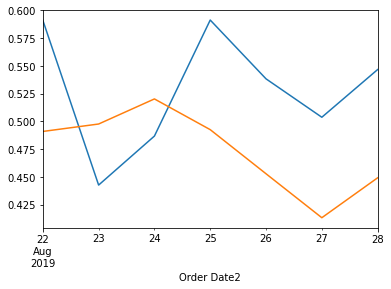

-1.479544516829888 47


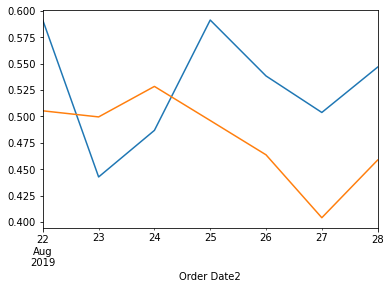

-1.3785205658144957 48


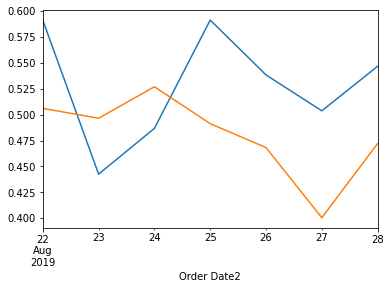

-1.5510738677808202 49


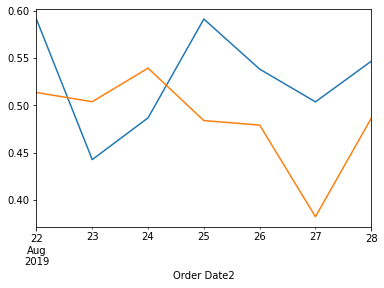

-1.5506176850980684 50


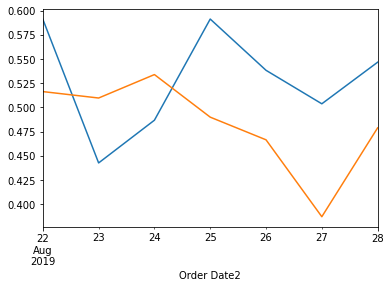

-0.8744407032883419 51


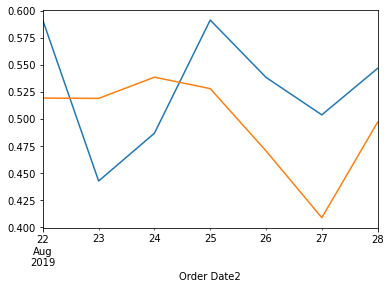

-1.00825196111701 52


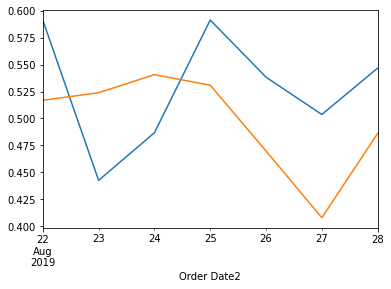

-0.7902531381658122 53


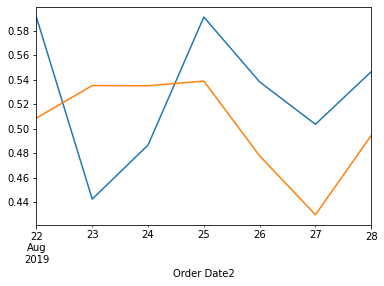

-0.6758490759646378 54


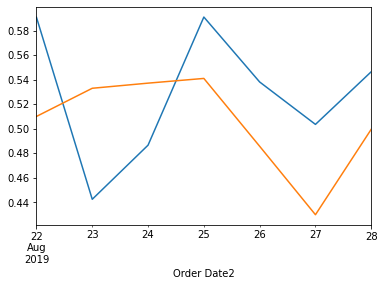

-0.8225763935696682 55


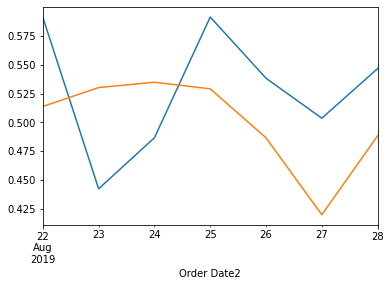

-0.5400694756524587 56


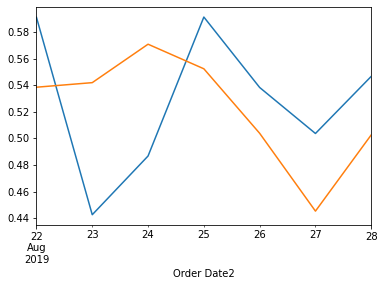

-0.621268806892384 57


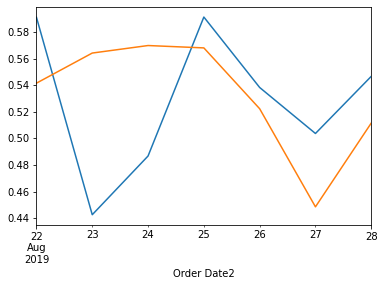

-0.6946875746424761 58


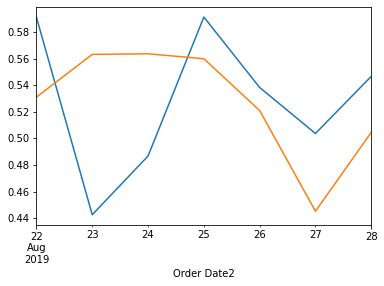

-0.9084594061292115 59


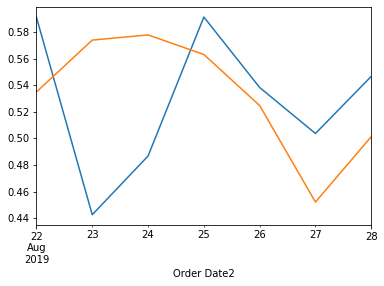

-0.9518422608254486 60


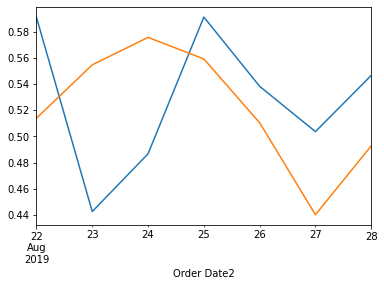

-0.8218319590475118 61


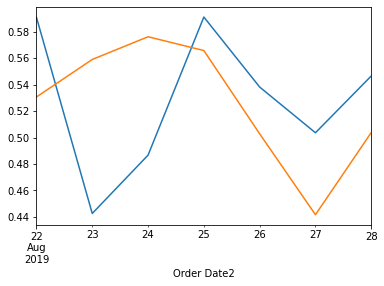

-0.7779160444271929 62


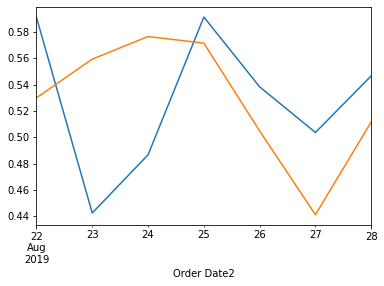

-0.8378247481016485 63


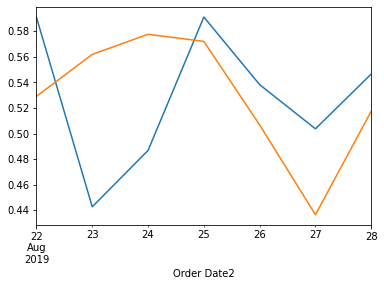

-0.7843778996102235 64


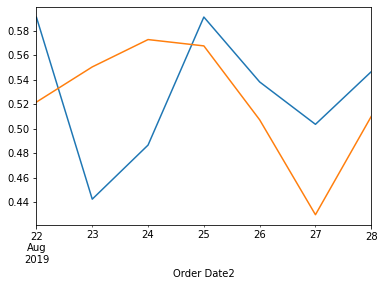

-0.7343758201970343 65


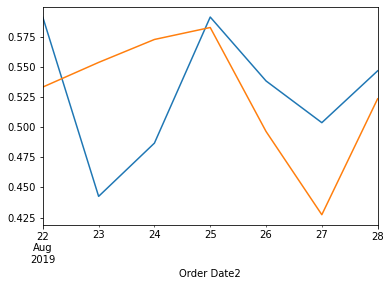

-0.7147558752529373 66


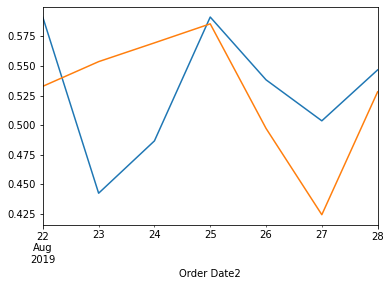

-0.6779162072919851 67


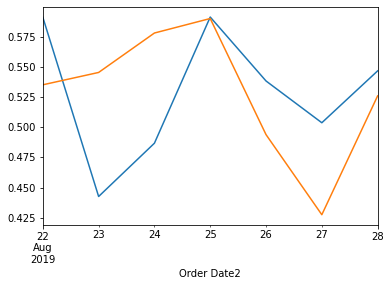

-0.6710719891351049 68


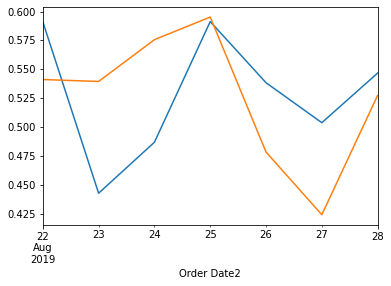

-0.5299213736001764 69


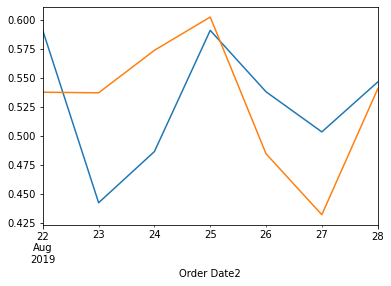

-0.5725149441065509 70


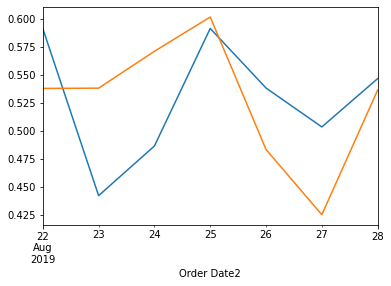

-0.5586273457323405 71


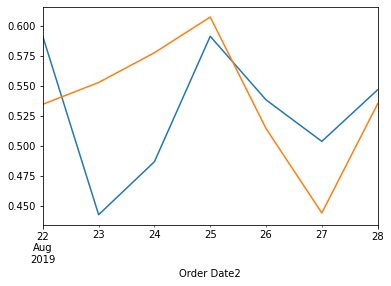

-0.5635616511446007 72


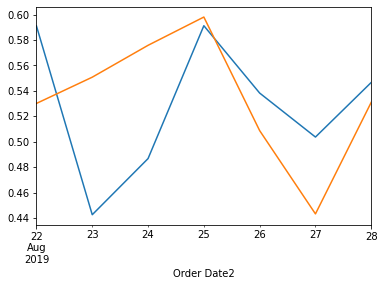

-1.4244897555526412 73


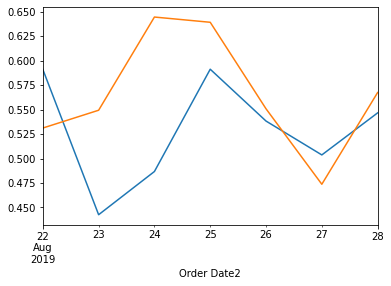

-0.6806895191280442 74


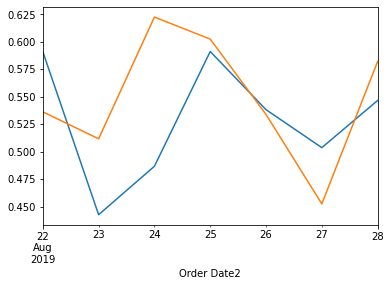

-0.4900094093825509 75


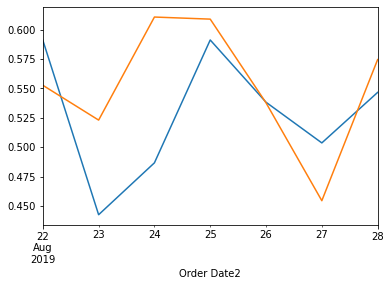

-1.497026227630153 76


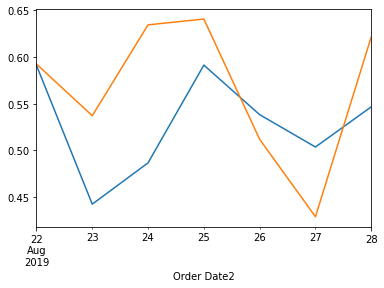

-1.5649606850320588 77


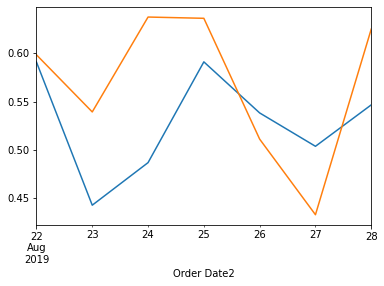

-1.5364645209562457 78


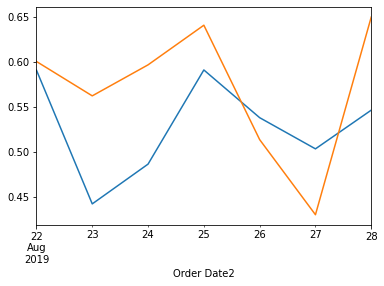

-1.5213522149540522 79


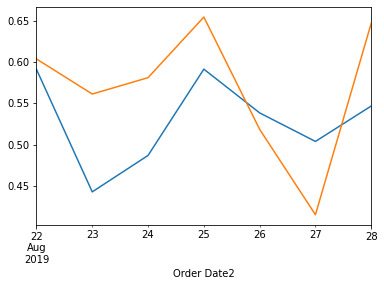

-1.4738221616284481 80


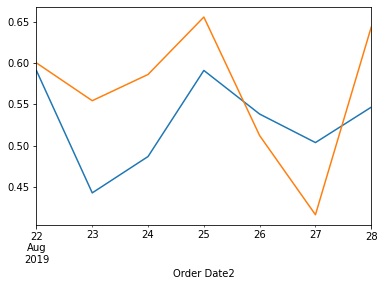

-1.552990893535155 81


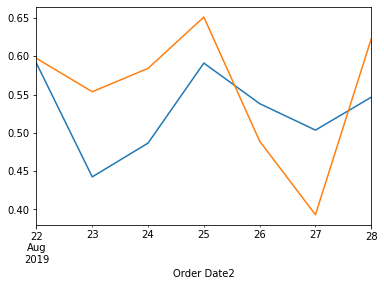

-1.4939025447191332 82


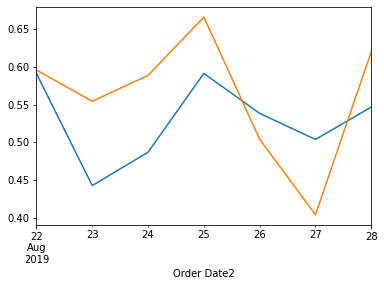

-1.1881731509471711 83


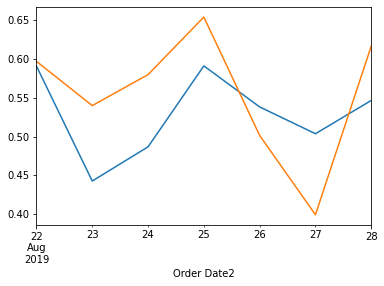

-0.501789394395945 84


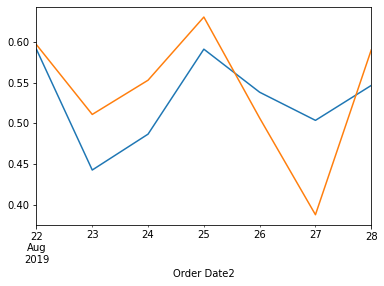

-0.5074720167785964 85


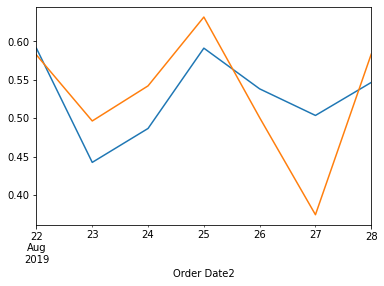

-0.5303110254066565 86


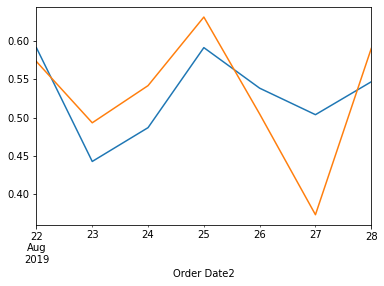

-0.9844927845199527 87


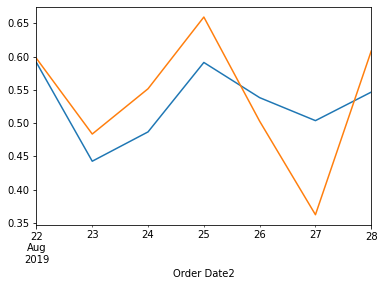

-1.0540382872950689 88


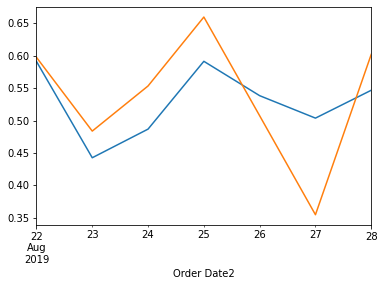

-1.311649563857519 89


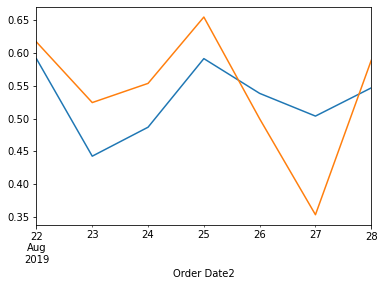

-1.209816203307852 90


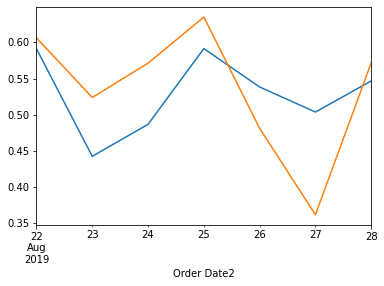

-1.4564243927108778 91


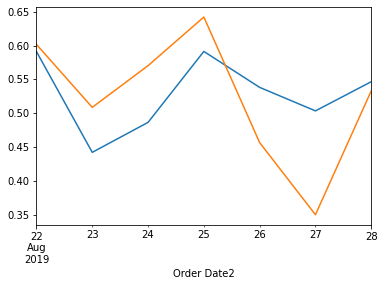

-2.4103215863397383 92


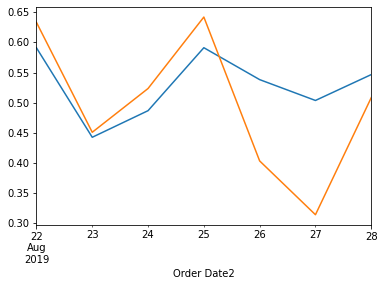

-3.4219122132174506 93


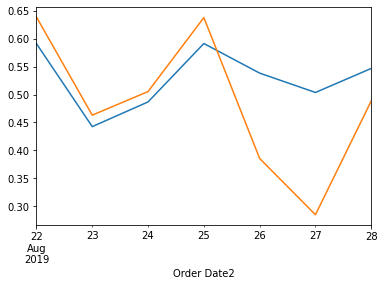

-3.59009673599311 94


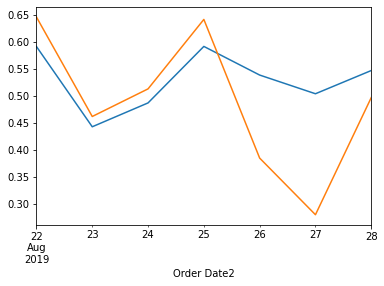

-3.7207635478949124 95


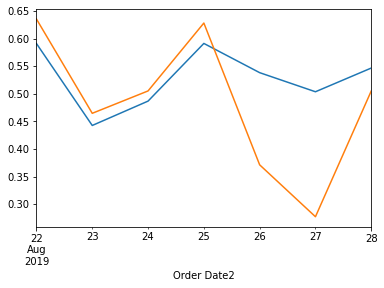

-4.230090001992562 96


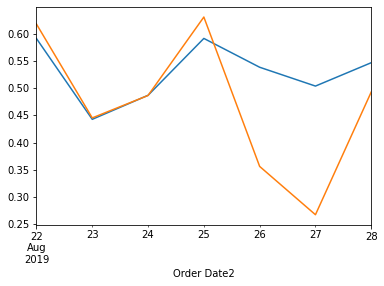

-4.64538170091564 97


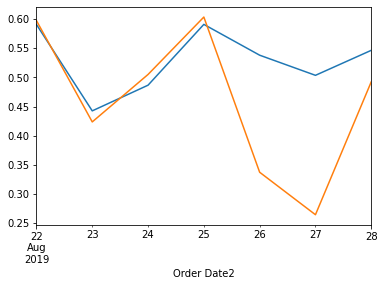

-7.443651544225629 98


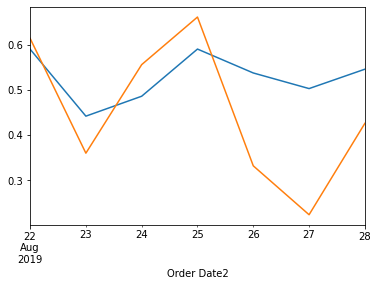

-6.12926713828753 99


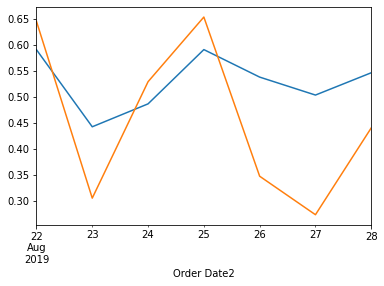

-6.5399995108637246 100


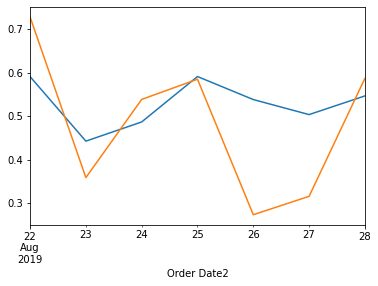

-9.744576678932058 101


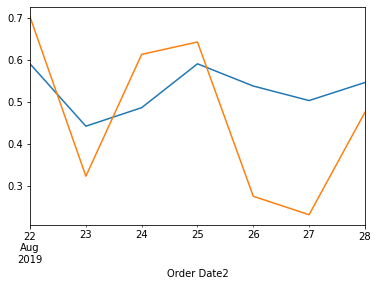

-7.215661140504297 102


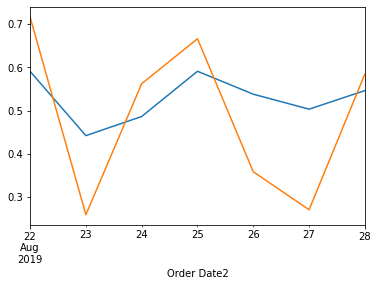

-12.013854055540698 103


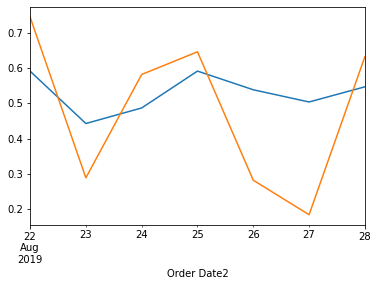

-12.847897699458985 104


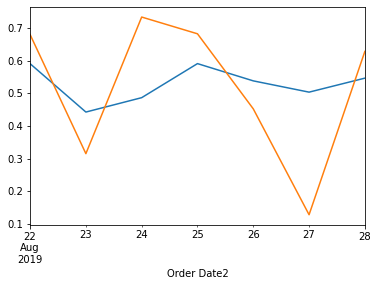

-13.61556428624643 105


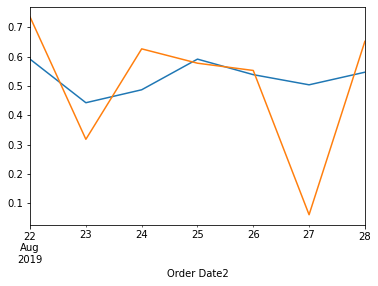

-14.274078137110697 106


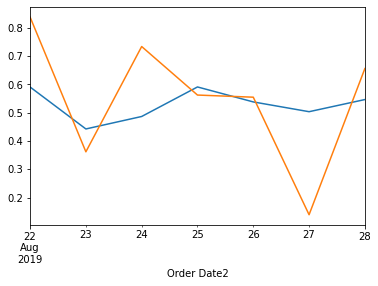

-19.866238356998892 107


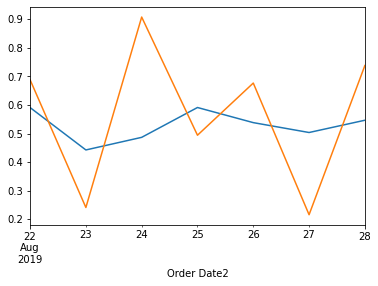

-19.93521472384538 108


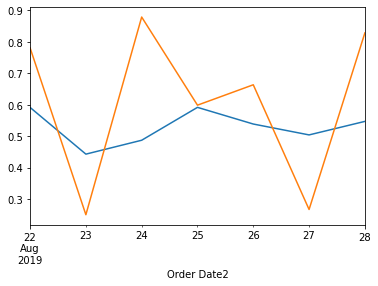

-31.130453600040674 109


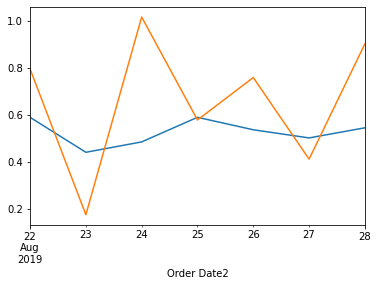

-38.11818168354148 110


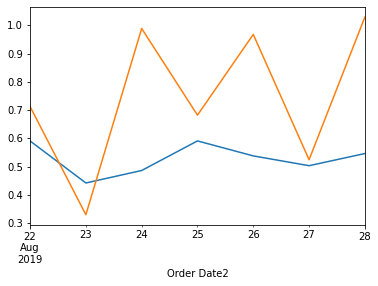

-85.06339040086695 111


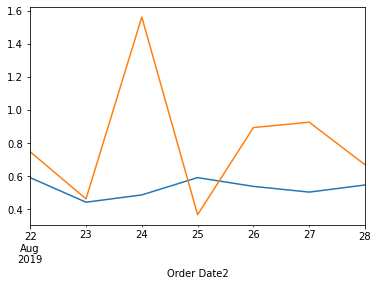

-163.50288705467136 112


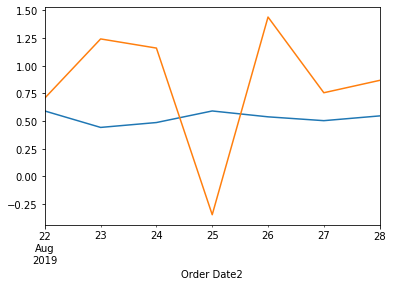

-1071.4918569400488 113


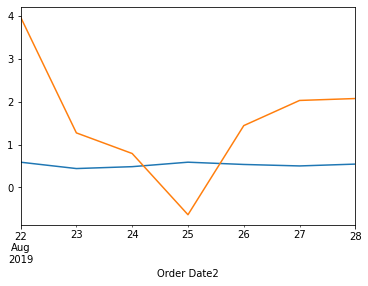

-56.224907466655715 114


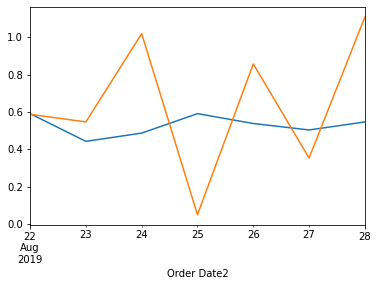

-17.37806460730822 115


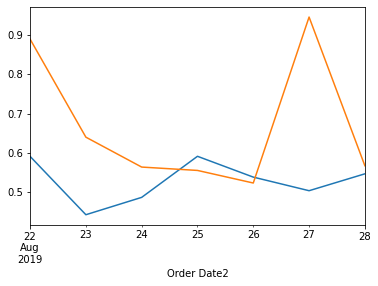

-21.2332521722473 116


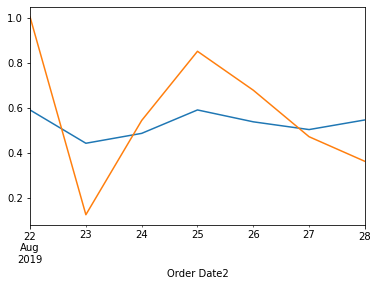

-12.014015792555211 117


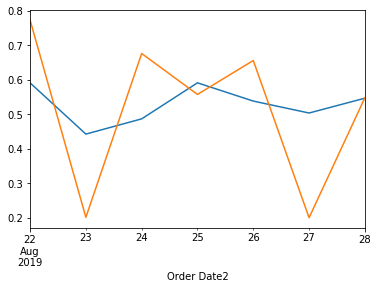

-17.074466648449103 118


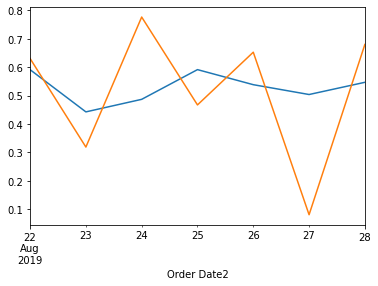

-13.045427239994964 119


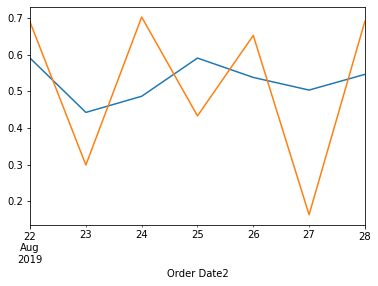

-11.56430658725896 120


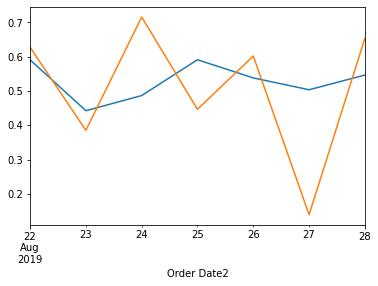

-9.761203744537807 121


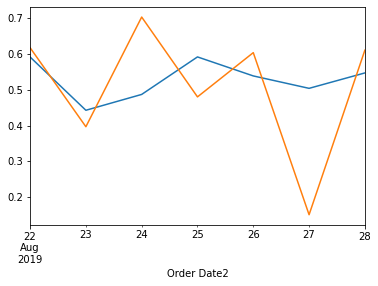

-13.532873079620645 122


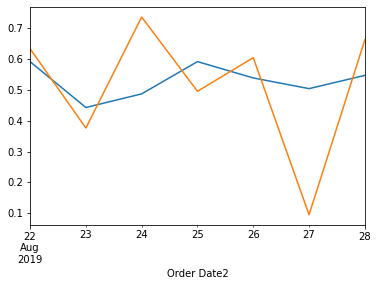

-15.646320878221285 123


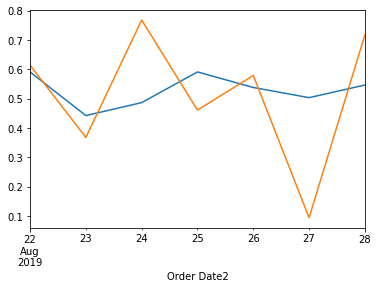

-16.43038893623468 124


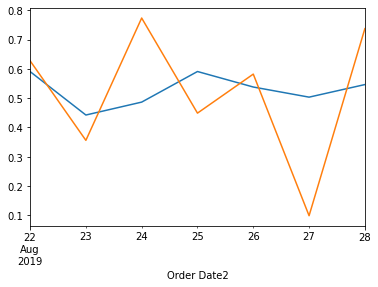

-8.268514508314116 125


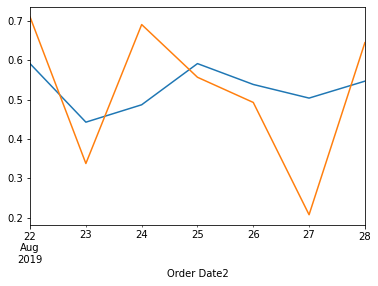

-5.3907856329858514 126


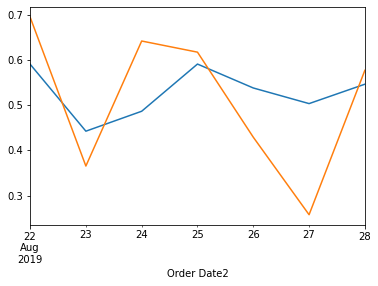

-7.622182310031295 127


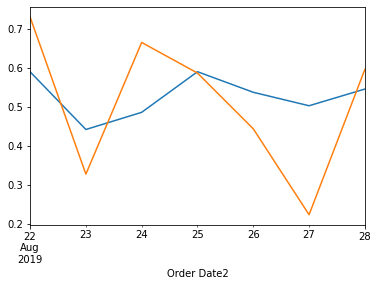

-3.7099921572206034 128


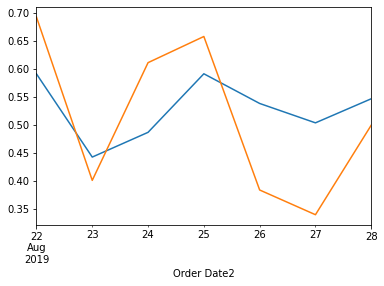

-4.453031262198642 129


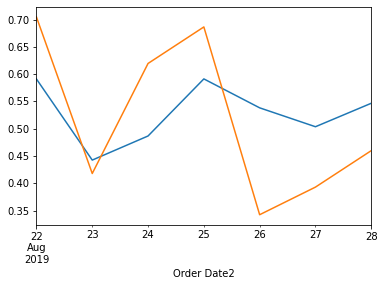

-3.6203795510962227 130


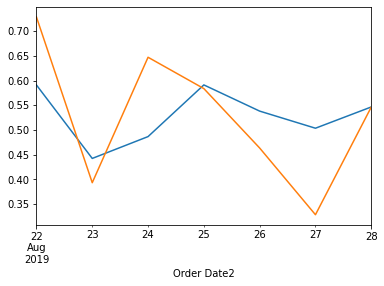

-1.8130855389095202 131


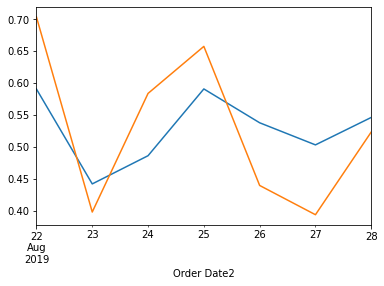

-1.6498036911663276 132


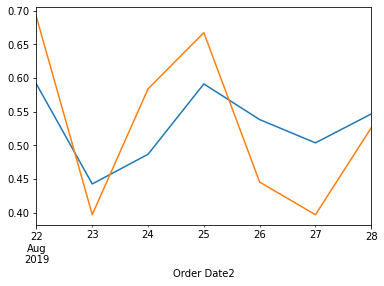

-2.1322459822202107 133


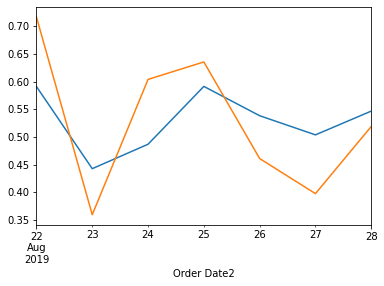

-0.9943377061300904 134


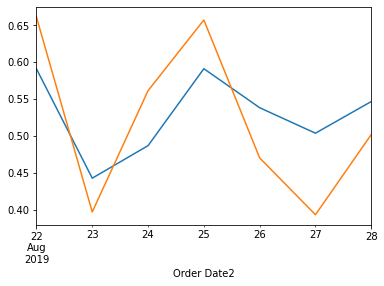

-0.926722323709837 135


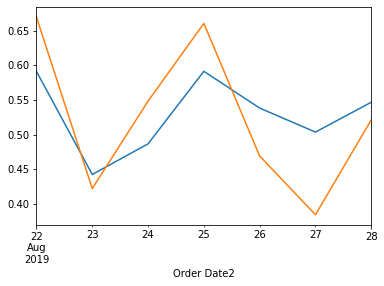

-0.9448711130814862 136


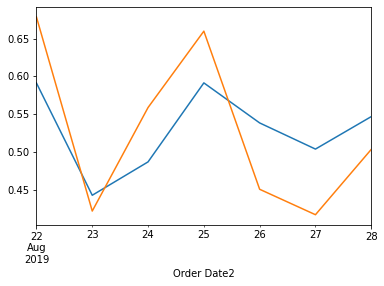

-0.6046240926179218 137


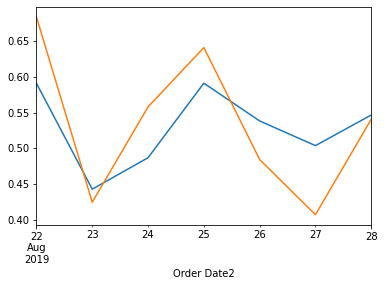

-0.5054381990730934 138


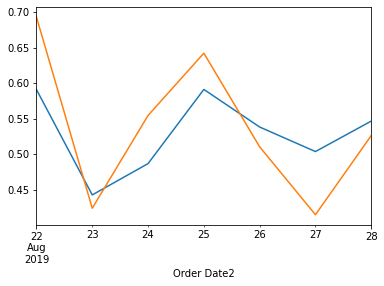

-1.0904821034134673 139


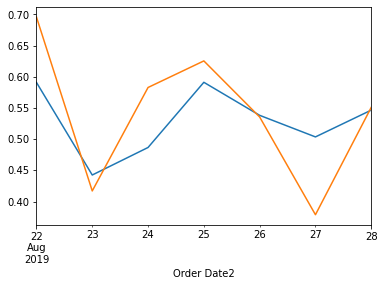

-0.8697724018753259 140


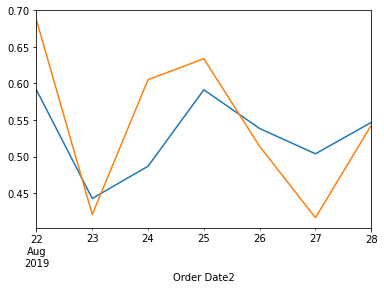

-0.7698029055412476 141


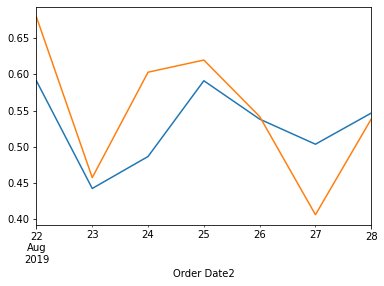

-0.2379946216518356 142


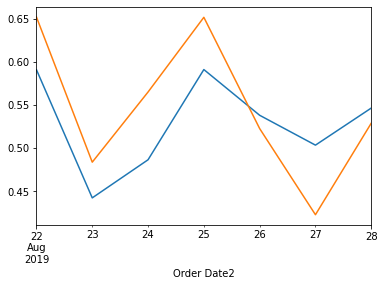

-0.3432292480050749 143


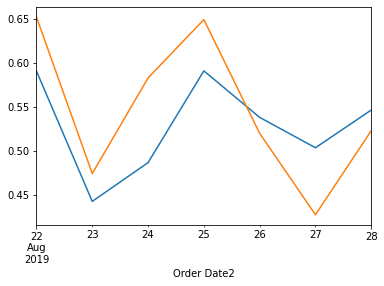

-0.4001308160464865 144


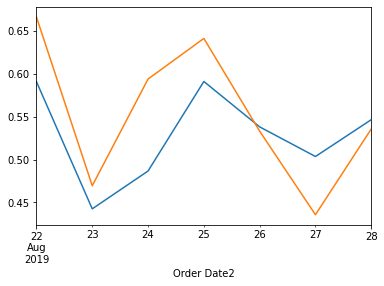

-0.4075688812743181 145


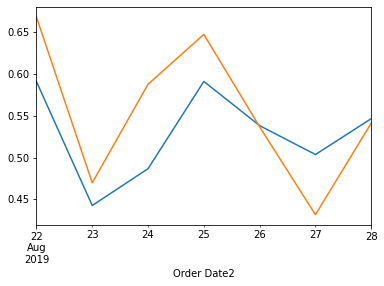

-0.27814692482441794 146


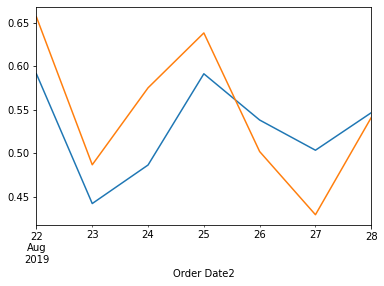

-0.4597536412302001 147


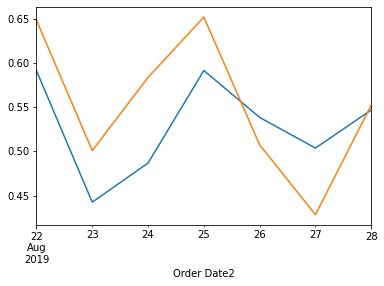

-0.4175512431029247 148


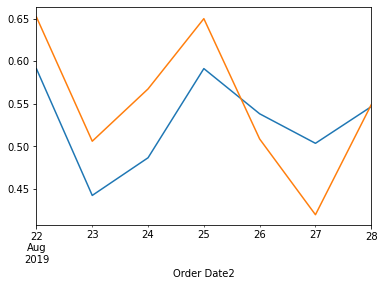

-0.5906353524760526 149


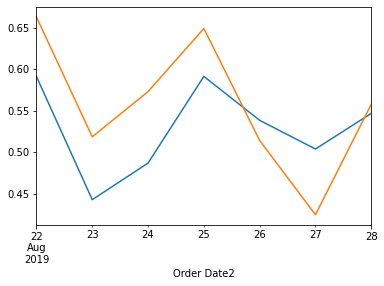

In [692]:
for _ in range(1,150,1):
    mod = ForecasterAutoregDirect(regressor=LinearRegression() ,steps = 7 ,lags=_)
    mod.fit(Xt)
    print(r2_score(Xc.iloc[:7].values,mod.predict().values),_)
    Xc.iloc[:7].plot()
    mod.predict().plot()
    plt.show()

- i think there is Extrapolated problem ,but it turned out is this method is bad

In [709]:
x=[]
y=[]
for _ in range(len(time_series)-13):
        print(time_series.values[_:_+7],0,time_series.values[_+7:_+14])
        x.append(time_series.values[_:_+7]),y.append(time_series.values[_+7:_+14])
    

[65420.91 70407.84 46793.74 61779.51 46160.62 52500.25 53493.66] 0 [55868.09 54944.27 56114.35 78304.82 47792.25 61021.67 49844.91]
[70407.84 46793.74 61779.51 46160.62 52500.25 53493.66 55868.09] 0 [54944.27 56114.35 78304.82 47792.25 61021.67 49844.91 63988.26]
[46793.74 61779.51 46160.62 52500.25 53493.66 55868.09 54944.27] 0 [56114.35 78304.82 47792.25 61021.67 49844.91 63988.26 51065.39]
[61779.51 46160.62 52500.25 53493.66 55868.09 54944.27 56114.35] 0 [78304.82 47792.25 61021.67 49844.91 63988.26 51065.39 54931.56]
[46160.62 52500.25 53493.66 55868.09 54944.27 56114.35 78304.82] 0 [47792.25 61021.67 49844.91 63988.26 51065.39 54931.56 48291.98]
[52500.25 53493.66 55868.09 54944.27 56114.35 78304.82 47792.25] 0 [61021.67 49844.91 63988.26 51065.39 54931.56 48291.98 56709.41]
[53493.66 55868.09 54944.27 56114.35 78304.82 47792.25 61021.67] 0 [49844.91 63988.26 51065.39 54931.56 48291.98 56709.41 67913.55]
[55868.09 54944.27 56114.35 78304.82 47792.25 61021.67 49844.91] 0 [63988.26

In [710]:
x

[array([65420.91, 70407.84, 46793.74, 61779.51, 46160.62, 52500.25,
        53493.66]),
 array([70407.84, 46793.74, 61779.51, 46160.62, 52500.25, 53493.66,
        55868.09]),
 array([46793.74, 61779.51, 46160.62, 52500.25, 53493.66, 55868.09,
        54944.27]),
 array([61779.51, 46160.62, 52500.25, 53493.66, 55868.09, 54944.27,
        56114.35]),
 array([46160.62, 52500.25, 53493.66, 55868.09, 54944.27, 56114.35,
        78304.82]),
 array([52500.25, 53493.66, 55868.09, 54944.27, 56114.35, 78304.82,
        47792.25]),
 array([53493.66, 55868.09, 54944.27, 56114.35, 78304.82, 47792.25,
        61021.67]),
 array([55868.09, 54944.27, 56114.35, 78304.82, 47792.25, 61021.67,
        49844.91]),
 array([54944.27, 56114.35, 78304.82, 47792.25, 61021.67, 49844.91,
        63988.26]),
 array([56114.35, 78304.82, 47792.25, 61021.67, 49844.91, 63988.26,
        51065.39]),
 array([78304.82, 47792.25, 61021.67, 49844.91, 63988.26, 51065.39,
        54931.56]),
 array([47792.25, 61021.67, 4984

In [711]:
y

[array([55868.09, 54944.27, 56114.35, 78304.82, 47792.25, 61021.67,
        49844.91]),
 array([54944.27, 56114.35, 78304.82, 47792.25, 61021.67, 49844.91,
        63988.26]),
 array([56114.35, 78304.82, 47792.25, 61021.67, 49844.91, 63988.26,
        51065.39]),
 array([78304.82, 47792.25, 61021.67, 49844.91, 63988.26, 51065.39,
        54931.56]),
 array([47792.25, 61021.67, 49844.91, 63988.26, 51065.39, 54931.56,
        48291.98]),
 array([61021.67, 49844.91, 63988.26, 51065.39, 54931.56, 48291.98,
        56709.41]),
 array([49844.91, 63988.26, 51065.39, 54931.56, 48291.98, 56709.41,
        67913.55]),
 array([63988.26, 51065.39, 54931.56, 48291.98, 56709.41, 67913.55,
        60655.77]),
 array([51065.39, 54931.56, 48291.98, 56709.41, 67913.55, 60655.77,
        59216.85]),
 array([54931.56, 48291.98, 56709.41, 67913.55, 60655.77, 59216.85,
        57046.3 ]),
 array([48291.98, 56709.41, 67913.55, 60655.77, 59216.85, 57046.3 ,
        55640.48]),
 array([56709.41, 67913.55, 6065

In [712]:
x = np.array(x)

In [713]:
y = np.array(y)

In [715]:
y.shape

(353, 7)

In [716]:
x.shape

(353, 7)

In [717]:
x = np.expand_dims(x,-1)

In [718]:
_ ,X_test ,_1  ,y_test = train_test_split(x ,y ,shuffle=False)
X_train ,X_cv ,y_train  ,y_cv = train_test_split(_ ,_1 ,shuffle=False)

In [719]:
X_train10 = (X_train)/m
y_train10 = (y_train)/m
X_cv10 = (X_cv)/m
y_cv10 = (y_cv)/m
X_test10 = (X_test)/m
y_test10 = (y_test)/m

In [720]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Bidirectional ,LSTM ,Lambda ,Input ,BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [734]:
lstm_model = Sequential([
    Input(X_train.shape[1:]),
    Bidirectional(LSTM(units=7*6,return_sequences=True)),
    Bidirectional(LSTM(units=7*5)),
    Dense(units=7*4, activation='swish'),
    Lambda(lambda x : x+0.01),
    Dense(units=7*3, activation='relu'),
    Dense(units=7*2, activation='relu'),
    Dense(units=7, activation='linear')
])


In [735]:
lstm_model.compile(loss='mse' ,optimizer=Adam(learning_rate=0.0001) ,metrics='mse')

In [736]:
history = lstm_model.fit(x = X_train10 ,y=y_train10 ,validation_data=(X_cv10 ,y_cv10) ,epochs=1000)

Epoch 1/1000
7/7 [==============================] - 38s 859ms/step - loss: 0.4428 - mse: 0.4428 - val_loss: 0.2873 - val_mse: 0.2873
Epoch 2/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.4342 - mse: 0.4342 - val_loss: 0.2815 - val_mse: 0.2815
Epoch 3/1000
7/7 [==============================] - 0s 29ms/step - loss: 0.4265 - mse: 0.4265 - val_loss: 0.2761 - val_mse: 0.2761
Epoch 4/1000
7/7 [==============================] - 0s 39ms/step - loss: 0.4193 - mse: 0.4193 - val_loss: 0.2710 - val_mse: 0.2710
Epoch 5/1000
7/7 [==============================] - 0s 33ms/step - loss: 0.4124 - mse: 0.4124 - val_loss: 0.2659 - val_mse: 0.2659
Epoch 6/1000
7/7 [==============================] - 0s 40ms/step - loss: 0.4052 - mse: 0.4052 - val_loss: 0.2604 - val_mse: 0.2604
Epoch 7/1000
7/7 [==============================] - 0s 23ms/step - loss: 0.3972 - mse: 0.3972 - val_loss: 0.2544 - val_mse: 0.2544
Epoch 8/1000
7/7 [==============================] - 0s 36ms/step - loss: 0.3884 -

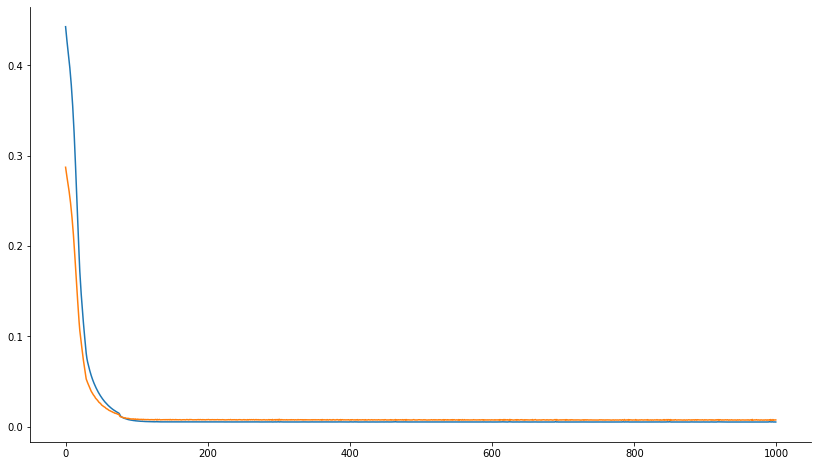

In [737]:
plt.subplots(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
sns.despine()
plt.show()

In [738]:
trainin_predi = (lstm_model.predict(X_train10))
cv_predi = (lstm_model.predict(X_cv10))
test_predi = (lstm_model.predict(X_test10))

3/3 [==============================] - 0s 7ms/step


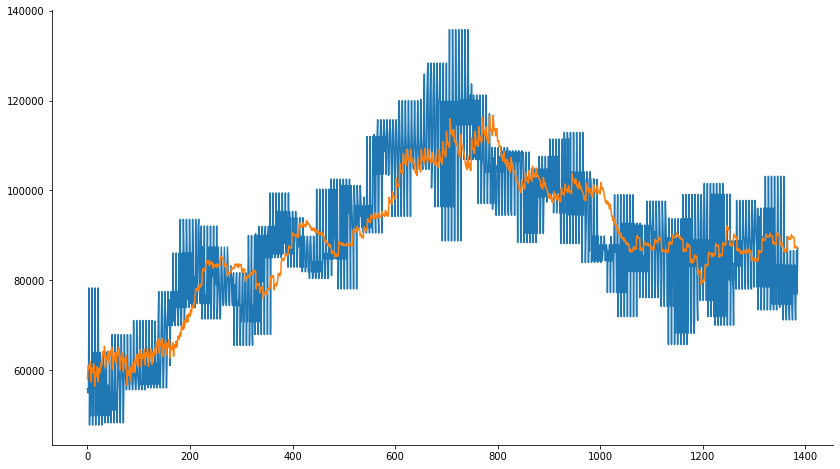

In [739]:
plt.subplots(figsize=(14,8))
plt.plot(y_train10.flatten()*m)
plt.plot(trainin_predi.flatten()*m)
sns.despine()
plt.show()

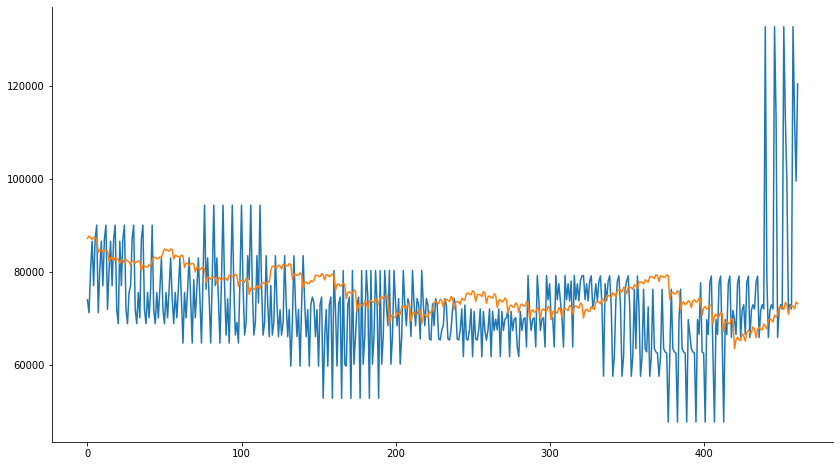

In [740]:
plt.subplots(figsize=(14,8))
plt.plot(y_cv10.flatten()*m)
plt.plot(cv_predi.flatten()*m)
sns.despine()
plt.show()

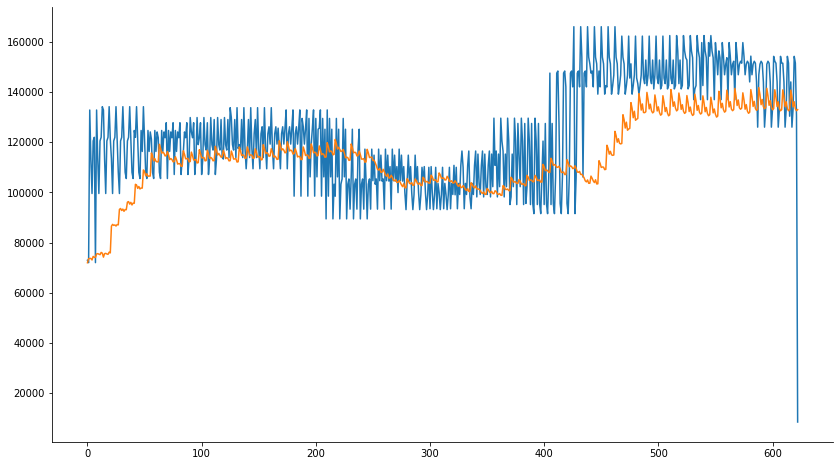

In [741]:
plt.subplots(figsize=(14,8))
plt.plot(y_test10.flatten()*m)
plt.plot(test_predi.flatten()*m)
sns.despine()
plt.show()

In [771]:
from scipy.stats import t
sample_mean = np.mean((lstm_model.predict(y_test[-1].reshape(1,7,1))*m).flatten())
sample_std = np.std((lstm_model.predict(y_test[-1].reshape(1,7,1))*m).flatten(), ddof=1)  # ddof=1 for sample standard deviation

# Desired confidence level (e.g., 95%)
confidence_level = 0.95

# Degrees of freedom for a time series is typically sample size - 1
degrees_of_freedom = 7 - 1

# Calculate the t-score
t_score = t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = t_score * (sample_std / np.sqrt(7))

# Confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 24ms/step


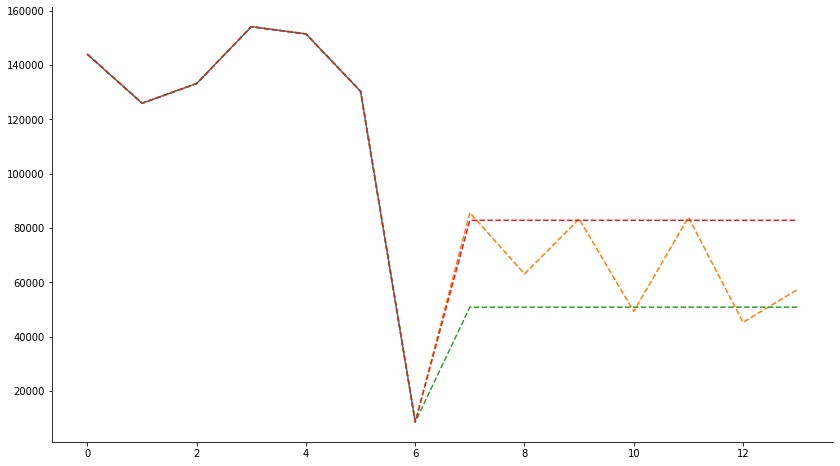

In [776]:
plt.subplots(figsize=(14,8))
plt.plot(time_series[-7:].values)
plt.plot(np.append(time_series[-7:].values,(lstm_model.predict(y_test[-1].reshape(1,7,1))*m).flatten()),'--')
plt.plot(np.append(time_series[-7:].values,np.array([lower_bound]*7)),'--')
plt.plot(np.append(time_series[-7:].values,np.array([upper_bound]*7)),'--')
sns.despine()
plt.show()